In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, normalized_mutual_info_score
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import torch
import torch.nn as nn
from tensorflow.keras.preprocessing.image import array_to_img
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, TensorDataset
from tqdm import tqdm  
from skimage.metrics import structural_similarity as ssim




In [2]:
# Alzheimer's
alz_mri_train = np.load('alz_mri_train.npy')
alz_mri_test = np.load('alz_mri_test.npy')
alz_mri_val = np.load('alz_mri_val.npy')
alz_pet_train = np.load('alz_pet_train.npy')
alz_pet_test = np.load('alz_pet_test.npy')
alz_pet_val = np.load('alz_pet_val.npy')
print("Alzheimer MRI Train size:", alz_mri_train.shape)
print("Alzheimer MRI Test size:", alz_mri_test.shape)
print("Alzheimer MRI Validation size:", alz_mri_val.shape)
print("Alzheimer PET Train size:", alz_pet_train.shape)
print("Alzheimer PET Test size:", alz_pet_test.shape)
print("Alzheimer PET Validation size:", alz_pet_val.shape)

# Bronchogenic 
brchgen_mri_train = np.load('brchgen_mri_train.npy')
brchgen_mri_test = np.load('brchgen_mri_test.npy')
brchgen_mri_val = np.load('brchgen_mri_val.npy')
brchgen_pet_train = np.load('brchgen_pet_train.npy')
brchgen_pet_test = np.load('brchgen_pet_test.npy')
brchgen_pet_val = np.load('brchgen_pet_val.npy')
print("Bronchogenic MRI Train size:", brchgen_mri_train.shape)
print("Bronchogenic MRI Test size:", brchgen_mri_test.shape)
print("Bronchogenic MRI Validation size:", brchgen_mri_val.shape)
print("Bronchogenic PET Train size:", brchgen_pet_train.shape)
print("Bronchogenic PET Test size:", brchgen_pet_test.shape)
print("Bronchogenic PET Validation size:", brchgen_pet_val.shape)

# Hypertensive Encephalopathy 
hyp_mri_train = np.load('hyp_mri_train.npy')
hyp_mri_test = np.load('hyp_mri_test.npy')
hyp_mri_val = np.load('hyp_mri_val.npy')
hyp_pet_train = np.load('hyp_pet_train.npy')
hyp_pet_test = np.load('hyp_pet_test.npy')
hyp_pet_val = np.load('hyp_pet_val.npy')
print("Hypertensive MRI Train size:", hyp_mri_train.shape)
print("Hypertensive MRI Test size:", hyp_mri_test.shape)
print("Hypertensive MRI Validation size:", hyp_mri_val.shape)
print("Hypertensive PET Train size:", hyp_pet_train.shape)
print("Hypertensive PET Test size:", hyp_pet_test.shape)
print("Hypertensive PET Validation size:", hyp_pet_val.shape)

# Motor Neuron Disease 
motor_mri_train = np.load('motor_mri_train.npy')
motor_mri_test = np.load('motor_mri_test.npy')
motor_mri_val = np.load('motor_mri_val.npy')
motor_pet_train = np.load('motor_pet_train.npy')
motor_pet_test = np.load('motor_pet_test.npy')
motor_pet_val = np.load('motor_pet_val.npy')
print("Motor Neuron MRI Train size:", motor_mri_train.shape)
print("Motor Neuron MRI Test size:", motor_mri_test.shape)
print("Motor Neuron MRI Validation size:", motor_mri_val.shape)
print("Motor Neuron PET Train size:", motor_pet_train.shape)
print("Motor Neuron PET Test size:", motor_pet_test.shape)
print("Motor Neuron PET Validation size:", motor_pet_val.shape)

# Normal Aging 
nrm_mri_train = np.load('nrm_mri_train.npy')
nrm_mri_test = np.load('nrm_mri_test.npy')
nrm_mri_val = np.load('nrm_mri_val.npy')
nrm_pet_train = np.load('nrm_pet_train.npy')
nrm_pet_test = np.load('nrm_pet_test.npy')
nrm_pet_val = np.load('nrm_pet_val.npy')
print("Normal Aging MRI Train size:", nrm_mri_train.shape)
print("Normal Aging MRI Test size:", nrm_mri_test.shape)
print("Normal Aging MRI Validation size:", nrm_mri_val.shape)
print("Normal Aging PET Train size:", nrm_pet_train.shape)
print("Normal Aging PET Test size:", nrm_pet_test.shape)
print("Normal Aging PET Validation size:", nrm_pet_val.shape)


Alzheimer MRI Train size: (256, 256, 3, 11)
Alzheimer MRI Test size: (256, 256, 3, 4)
Alzheimer MRI Validation size: (256, 256, 3, 4)
Alzheimer PET Train size: (256, 256, 3, 11)
Alzheimer PET Test size: (256, 256, 3, 4)
Alzheimer PET Validation size: (256, 256, 3, 4)
Bronchogenic MRI Train size: (256, 256, 3, 12)
Bronchogenic MRI Test size: (256, 256, 3, 5)
Bronchogenic MRI Validation size: (256, 256, 3, 4)
Bronchogenic PET Train size: (256, 256, 3, 12)
Bronchogenic PET Test size: (256, 256, 3, 5)
Bronchogenic PET Validation size: (256, 256, 3, 4)
Hypertensive MRI Train size: (256, 256, 3, 11)
Hypertensive MRI Test size: (256, 256, 3, 4)
Hypertensive MRI Validation size: (256, 256, 3, 4)
Hypertensive PET Train size: (256, 256, 3, 11)
Hypertensive PET Test size: (256, 256, 3, 4)
Hypertensive PET Validation size: (256, 256, 3, 4)
Motor Neuron MRI Train size: (256, 256, 3, 12)
Motor Neuron MRI Test size: (256, 256, 3, 4)
Motor Neuron MRI Validation size: (256, 256, 3, 4)
Motor Neuron PET 

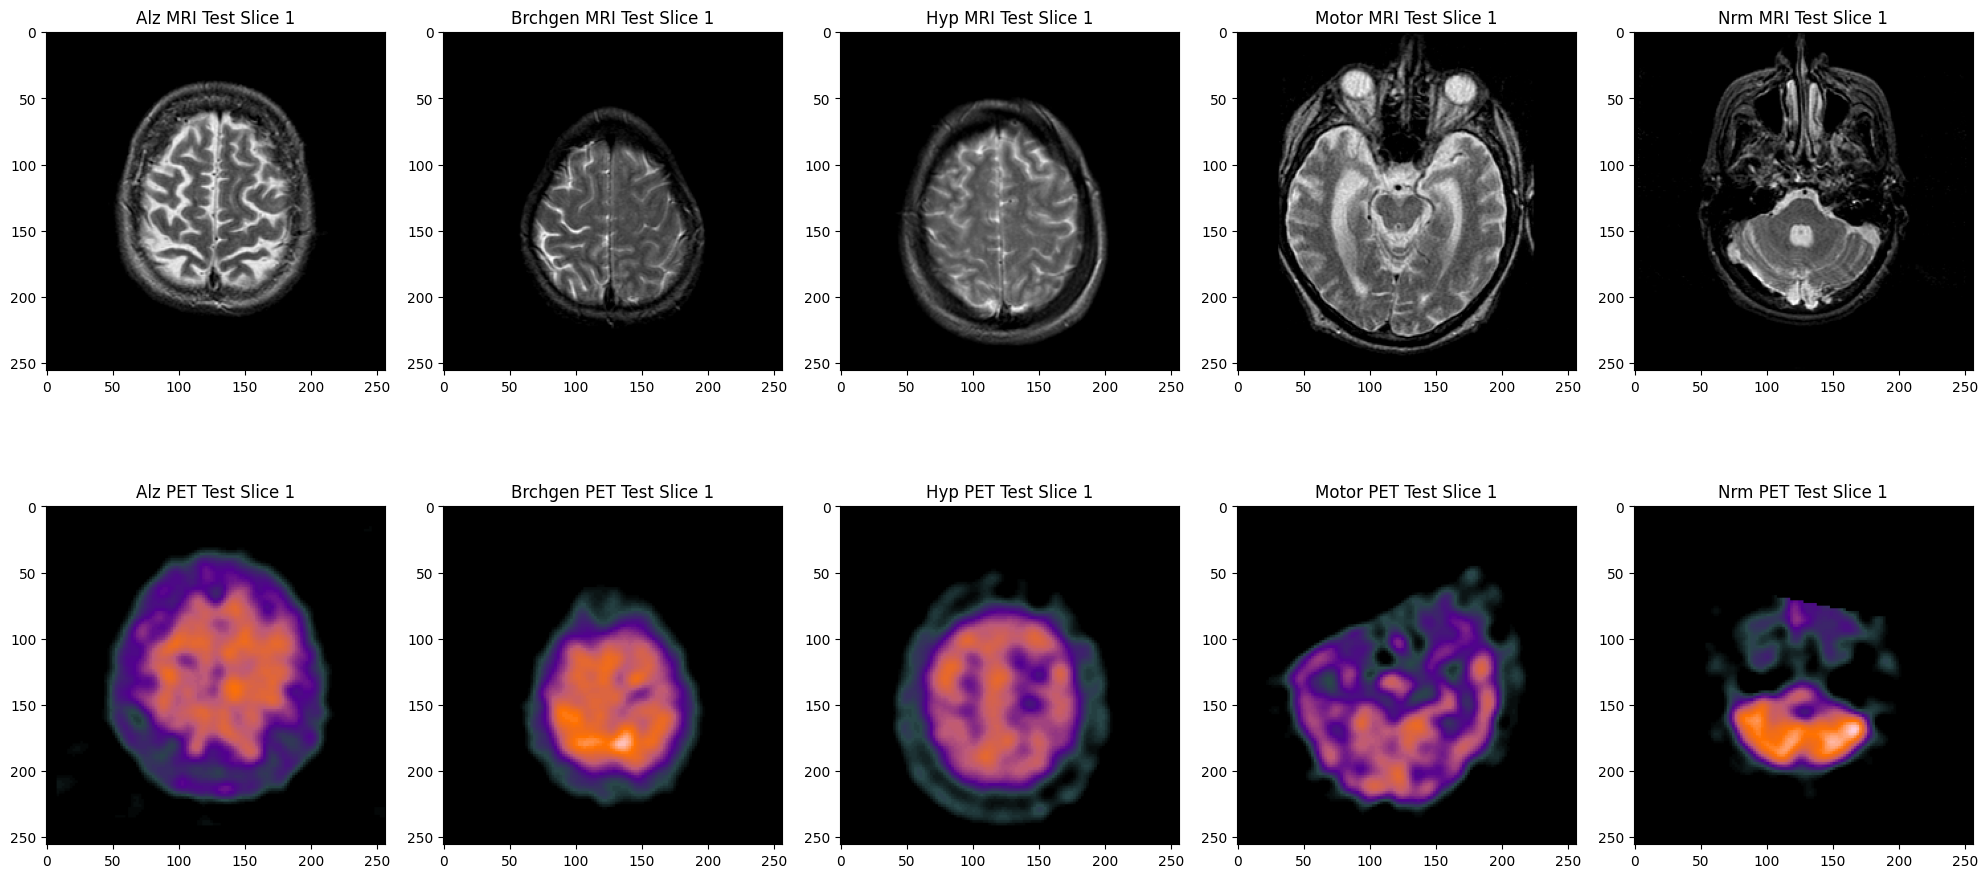

In [3]:
slice_number = 1

alz_mri_test1 = alz_mri_test[:, :, :, slice_number]
alz_pet_test1 = alz_pet_test[:, :, :, slice_number]
brchgen_mri_test1 = brchgen_mri_test[:, :, :, slice_number]
brchgen_pet_test1 = brchgen_pet_test[:, :, :, slice_number]
hyp_mri_test1 = hyp_mri_test[:, :, :, slice_number]
hyp_pet_test1 = hyp_pet_test[:, :, :, slice_number]
motor_mri_test1 = motor_mri_test[:, :, :, slice_number]
motor_pet_test1 = motor_pet_test[:, :, :, slice_number]
nrm_mri_test1 = nrm_mri_test[:, :, :, slice_number]
nrm_pet_test1 = nrm_pet_test[:, :, :, slice_number]

plt.figure(figsize=(20, 10))

plt.subplot(2, 5, 1)
plt.imshow(alz_mri_test1, cmap='gray')
plt.title(f'Alz MRI Test Slice {slice_number}')

plt.subplot(2, 5, 2)
plt.imshow(brchgen_mri_test1, cmap='gray')
plt.title(f'Brchgen MRI Test Slice {slice_number}')

plt.subplot(2, 5, 3)
plt.imshow(hyp_mri_test1, cmap='gray')
plt.title(f'Hyp MRI Test Slice {slice_number}')

plt.subplot(2, 5, 4)
plt.imshow(motor_mri_test1, cmap='gray')
plt.title(f'Motor MRI Test Slice {slice_number}')

plt.subplot(2, 5, 5)
plt.imshow(nrm_mri_test1, cmap='gray')
plt.title(f'Nrm MRI Test Slice {slice_number}')

plt.subplot(2, 5, 6)  
plt.imshow(alz_pet_test1, cmap='gray')
plt.title(f'Alz PET Test Slice {slice_number}')

plt.subplot(2, 5, 7)
plt.imshow(brchgen_pet_test1, cmap='gray')
plt.title(f'Brchgen PET Test Slice {slice_number}')

plt.subplot(2, 5, 8)
plt.imshow(hyp_pet_test1, cmap='gray')
plt.title(f'Hyp PET Test Slice {slice_number}')

plt.subplot(2, 5, 9)
plt.imshow(motor_pet_test1, cmap='gray')
plt.title(f'Motor PET Test Slice {slice_number}')

plt.subplot(2, 5, 10)
plt.imshow(nrm_pet_test1, cmap='gray')
plt.title(f'Nrm PET Test Slice {slice_number}')

plt.tight_layout()  
plt.show()

In [4]:
# to tensor
# Alzheimer's Disease
alz_mri_train_tensor = torch.tensor(alz_mri_train, dtype=torch.float32).permute(3, 0, 1, 2)
alz_mri_test_tensor = torch.tensor(alz_mri_test, dtype=torch.float32).permute(3, 0, 1, 2)
alz_mri_val_tensor = torch.tensor(alz_mri_val, dtype=torch.float32).permute(3, 0, 1, 2)
alz_pet_train_tensor = torch.tensor(alz_pet_train, dtype=torch.float32).permute(3, 0, 1, 2)
alz_pet_test_tensor = torch.tensor(alz_pet_test, dtype=torch.float32).permute(3, 0, 1, 2)
alz_pet_val_tensor = torch.tensor(alz_pet_val, dtype=torch.float32).permute(3, 0, 1, 2)


# Brain Congenital
brchgen_mri_train_tensor = torch.tensor(brchgen_mri_train, dtype=torch.float32).permute(3, 0, 1, 2)
brchgen_mri_test_tensor = torch.tensor(brchgen_mri_test, dtype=torch.float32).permute(3, 0, 1, 2)
brchgen_mri_val_tensor = torch.tensor(brchgen_mri_val, dtype=torch.float32).permute(3, 0, 1, 2)
brchgen_pet_train_tensor = torch.tensor(brchgen_pet_train, dtype=torch.float32).permute(3, 0, 1, 2)
brchgen_pet_test_tensor = torch.tensor(brchgen_pet_test, dtype=torch.float32).permute(3, 0, 1, 2)
brchgen_pet_val_tensor = torch.tensor(brchgen_pet_val, dtype=torch.float32).permute(3, 0, 1, 2)

# Hypertensive
hyp_mri_train_tensor = torch.tensor(hyp_mri_train, dtype=torch.float32).permute(3, 0, 1, 2)
hyp_mri_test_tensor = torch.tensor(hyp_mri_test, dtype=torch.float32).permute(3, 0, 1, 2)
hyp_mri_val_tensor = torch.tensor(hyp_mri_val, dtype=torch.float32).permute(3, 0, 1, 2)
hyp_pet_train_tensor = torch.tensor(hyp_pet_train, dtype=torch.float32).permute(3, 0, 1, 2)
hyp_pet_test_tensor = torch.tensor(hyp_pet_test, dtype=torch.float32).permute(3, 0, 1, 2)
hyp_pet_val_tensor = torch.tensor(hyp_pet_val, dtype=torch.float32).permute(3, 0, 1, 2)

# Motor Neuron
motor_mri_train_tensor = torch.tensor(motor_mri_train, dtype=torch.float32).permute(3, 0, 1, 2)
motor_mri_test_tensor = torch.tensor(motor_mri_test, dtype=torch.float32).permute(3, 0, 1, 2)
motor_mri_val_tensor = torch.tensor(motor_mri_val, dtype=torch.float32).permute(3, 0, 1, 2)
motor_pet_train_tensor = torch.tensor(motor_pet_train, dtype=torch.float32).permute(3, 0, 1, 2)
motor_pet_test_tensor = torch.tensor(motor_pet_test, dtype=torch.float32).permute(3, 0, 1, 2)
motor_pet_val_tensor = torch.tensor(motor_pet_val, dtype=torch.float32).permute(3, 0, 1, 2)

# Normal Aging
nrm_mri_train_tensor = torch.tensor(nrm_mri_train, dtype=torch.float32).permute(3, 0, 1, 2)
nrm_mri_test_tensor = torch.tensor(nrm_mri_test, dtype=torch.float32).permute(3, 0, 1, 2)
nrm_mri_val_tensor = torch.tensor(nrm_mri_val, dtype=torch.float32).permute(3, 0, 1, 2)
nrm_pet_train_tensor = torch.tensor(nrm_pet_train, dtype=torch.float32).permute(3, 0, 1, 2)
nrm_pet_test_tensor = torch.tensor(nrm_pet_test, dtype=torch.float32).permute(3, 0, 1, 2)
nrm_pet_val_tensor = torch.tensor(nrm_pet_val, dtype=torch.float32).permute(3, 0, 1, 2)

In [5]:
# TensorDatasets
alz_train_dataset = TensorDataset(alz_mri_train_tensor, alz_pet_train_tensor)
alz_test_dataset = TensorDataset(alz_mri_test_tensor, alz_pet_test_tensor)
alz_val_dataset = TensorDataset(alz_mri_val_tensor, alz_pet_val_tensor)

brchgen_train_dataset = TensorDataset(brchgen_mri_train_tensor, brchgen_pet_train_tensor)
brchgen_test_dataset = TensorDataset(brchgen_mri_test_tensor, brchgen_pet_test_tensor)
brchgen_val_dataset = TensorDataset(brchgen_mri_val_tensor, brchgen_pet_val_tensor)

hyp_train_dataset = TensorDataset(hyp_mri_train_tensor, hyp_pet_train_tensor)
hyp_test_dataset = TensorDataset(hyp_mri_test_tensor, hyp_pet_test_tensor)
hyp_val_dataset = TensorDataset(hyp_mri_val_tensor, hyp_pet_val_tensor)

motor_train_dataset = TensorDataset(motor_mri_train_tensor, motor_pet_train_tensor)
motor_test_dataset = TensorDataset(motor_mri_test_tensor, motor_pet_test_tensor)
motor_val_dataset = TensorDataset(motor_mri_val_tensor, motor_pet_val_tensor)

nrm_train_dataset = TensorDataset(nrm_mri_train_tensor, nrm_pet_train_tensor)
nrm_test_dataset = TensorDataset(nrm_mri_test_tensor, nrm_pet_test_tensor)
nrm_val_dataset = TensorDataset(nrm_mri_val_tensor, nrm_pet_val_tensor)

# DataLoaders
batch_size = 32

alz_train_loader = DataLoader(alz_train_dataset, batch_size=batch_size, shuffle=True)
alz_val_loader = DataLoader(alz_val_dataset, batch_size=batch_size, shuffle=False)
alz_test_loader = DataLoader(alz_test_dataset, batch_size=batch_size, shuffle=False)
print(f"Alzheimer's MRI Train set shape: {alz_mri_train_tensor.shape}")
print(f"Alzheimer's MRI Test set shape: {alz_mri_test_tensor.shape}")
print(f"Alzheimer's MRI Validation set shape: {alz_mri_val_tensor.shape}")
print(f"Alzheimer's PET Train set shape: {alz_pet_train_tensor.shape}")
print(f"Alzheimer's PET Test set shape: {alz_pet_test_tensor.shape}")
print(f"Alzheimer's PET Validation set shape: {alz_pet_val_tensor.shape}")

brchgen_train_loader = DataLoader(brchgen_train_dataset, batch_size=batch_size, shuffle=True)
brchgen_val_loader = DataLoader(brchgen_val_dataset, batch_size=batch_size, shuffle=False)
brchgen_test_loader = DataLoader(brchgen_test_dataset, batch_size=batch_size, shuffle=False)
print(f"Brchgen MRI Train set shape: {brchgen_mri_train_tensor.shape}")
print(f"Brchgen MRI Test set shape: {brchgen_mri_test_tensor.shape}")
print(f"Brchgen MRI Validation set shape: {brchgen_mri_val_tensor.shape}")
print(f"Brchgen PET Train set shape: {brchgen_pet_train_tensor.shape}")
print(f"Brchgen PET Test set shape: {brchgen_pet_test_tensor.shape}")
print(f"Brchgen PET Validation set shape: {brchgen_pet_val_tensor.shape}")

hyp_train_loader = DataLoader(hyp_train_dataset, batch_size=batch_size, shuffle=True)
hyp_val_loader = DataLoader(hyp_val_dataset, batch_size=batch_size, shuffle=False)
hyp_test_loader = DataLoader(hyp_test_dataset, batch_size=batch_size, shuffle=False)
print(f"Hypertensive MRI Train set shape: {hyp_mri_train_tensor.shape}")
print(f"Hypertensive MRI Test set shape: {hyp_mri_test_tensor.shape}")
print(f"Hypertensive MRI Validation set shape: {hyp_mri_val_tensor.shape}")
print(f"Hypertensive PET Train set shape: {hyp_pet_train_tensor.shape}")
print(f"Hypertensive PET Test set shape: {hyp_pet_test_tensor.shape}")
print(f"Hypertensive PET Validation set shape: {hyp_pet_val_tensor.shape}")

motor_train_loader = DataLoader(motor_train_dataset, batch_size=batch_size, shuffle=True)
motor_val_loader = DataLoader(motor_val_dataset, batch_size=batch_size, shuffle=False)
motor_test_loader = DataLoader(motor_test_dataset, batch_size=batch_size, shuffle=False)
print(f"Motor Neuron MRI Train set shape: {motor_mri_train_tensor.shape}")
print(f"Motor Neuron MRI Test set shape: {motor_mri_test_tensor.shape}")
print(f"Motor Neuron MRI Validation set shape: {motor_mri_val_tensor.shape}")
print(f"Motor Neuron PET Train set shape: {motor_pet_train_tensor.shape}")
print(f"Motor Neuron PET Test set shape: {motor_pet_test_tensor.shape}")
print(f"Motor Neuron PET Validation set shape: {motor_pet_val_tensor.shape}")

nrm_train_loader = DataLoader(nrm_train_dataset, batch_size=batch_size, shuffle=True)
nrm_val_loader = DataLoader(nrm_val_dataset, batch_size=batch_size, shuffle=False)
nrm_test_loader = DataLoader(nrm_test_dataset, batch_size=batch_size, shuffle=False)
print(f"Normal Aging MRI Train set shape: {nrm_mri_train_tensor.shape}")
print(f"Normal Aging MRI Test set shape: {nrm_mri_test_tensor.shape}")
print(f"Normal Aging MRI Validation set shape: {nrm_mri_val_tensor.shape}")
print(f"Normal Aging PET Train set shape: {nrm_pet_train_tensor.shape}")
print(f"Normal Aging PET Test set shape: {nrm_pet_test_tensor.shape}")
print(f"Normal Aging PET Validation set shape: {nrm_pet_val_tensor.shape}")


Alzheimer's MRI Train set shape: torch.Size([11, 256, 256, 3])
Alzheimer's MRI Test set shape: torch.Size([4, 256, 256, 3])
Alzheimer's MRI Validation set shape: torch.Size([4, 256, 256, 3])
Alzheimer's PET Train set shape: torch.Size([11, 256, 256, 3])
Alzheimer's PET Test set shape: torch.Size([4, 256, 256, 3])
Alzheimer's PET Validation set shape: torch.Size([4, 256, 256, 3])
Brchgen MRI Train set shape: torch.Size([12, 256, 256, 3])
Brchgen MRI Test set shape: torch.Size([5, 256, 256, 3])
Brchgen MRI Validation set shape: torch.Size([4, 256, 256, 3])
Brchgen PET Train set shape: torch.Size([12, 256, 256, 3])
Brchgen PET Test set shape: torch.Size([5, 256, 256, 3])
Brchgen PET Validation set shape: torch.Size([4, 256, 256, 3])
Hypertensive MRI Train set shape: torch.Size([11, 256, 256, 3])
Hypertensive MRI Test set shape: torch.Size([4, 256, 256, 3])
Hypertensive MRI Validation set shape: torch.Size([4, 256, 256, 3])
Hypertensive PET Train set shape: torch.Size([11, 256, 256, 3])
Hy

In [6]:
# # fusion simple fusion for all, not really "fused"
# def simple_fusion(img1, img2, weight1=0.3, weight2=0.7):
#     img1 = img1.astype(np.uint8)
#     img2 = img2.astype(np.uint8)

#     fused_image = cv2.addWeighted(img1, weight1, img2, weight2, 0)
#     return fused_image

# def fuse_and_display_images(dataloader, output_folder, disease_name):
#     disease_folder = os.path.join(output_folder, disease_name)
#     os.makedirs(disease_folder, exist_ok=True)
    
#     for i, (mri_batch, pet_batch) in enumerate(dataloader):
#         mri_image = mri_batch[0].numpy()
#         pet_image = pet_batch[0].numpy()

#         mri_image = (mri_image * 255).astype(np.uint8)
#         pet_image = (pet_image * 255).astype(np.uint8)

#         fused_image = simple_fusion(mri_image, pet_image, weight1=0.3, weight2=0.7)

#         plt.imshow(cv2.cvtColor(fused_image, cv2.COLOR_BGR2RGB))
#         plt.title(f"Fused Image (Simple Fusion) - {disease_name} - Image {i}")
#         plt.axis("off")
#         plt.show()
        
#         output_path = os.path.join(disease_folder, f"{disease_name}_fused_img_{i}.png")
#         cv2.imwrite(output_path, fused_image)
#         print(f"Saved fused image: {output_path}")

# output_folder = "output"
# os.makedirs(output_folder, exist_ok=True)

# fuse_and_display_images(alz_train_loader, output_folder, "Alzheimer")
# fuse_and_display_images(brchgen_train_loader, output_folder, "BrainCongenital")
# fuse_and_display_images(hyp_train_loader, output_folder, "Hypertensive")
# fuse_and_display_images(motor_train_loader, output_folder, "MotorNeuron")
# fuse_and_display_images(nrm_train_loader, output_folder, "NormalAging")

In [7]:
num_augmentations = 5  

train_augmentation_pipeline = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(90),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

augmented_train_set = []

for batch in alz_train_loader:
    mri_images, pet_images = batch 
    for mri_image, pet_image in zip(mri_images, pet_images):
        for _ in range(num_augmentations): 
            
            if mri_image.ndimension() == 3 and mri_image.shape[-1] == 3:
                mri_image = mri_image.permute(2, 0, 1)
            if pet_image.ndimension() == 3 and pet_image.shape[-1] == 3:
                pet_image = pet_image.permute(2, 0, 1)
            
            mri_image = mri_image.to(torch.float32)
            pet_image = pet_image.to(torch.float32)

            augmented_mri_image = train_augmentation_pipeline(mri_image)
            augmented_pet_image = train_augmentation_pipeline(pet_image)

            augmented_train_set.append((augmented_mri_image.numpy(), augmented_pet_image.numpy()))


augmented_train_set = np.array(augmented_train_set)
print("Augmented training set shape:", augmented_train_set.shape)
augmented_mri_images = augmented_train_set[:, 0]  
print('augmented mri:',augmented_mri_images.shape)
augmented_pet_images = augmented_train_set[:, 1]  
print('augmented pet:',augmented_pet_images.shape)


Augmented training set shape: (55, 2, 3, 256, 256)
augmented mri: (55, 3, 256, 256)
augmented pet: (55, 3, 256, 256)


In [8]:
PATCH_SIZE = 32
STRIDE = 16
NUM_AUGMENTATIONS = 5

augmentation_pipeline = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(90),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

def extract_augmented_patches(dataset, patch_size=PATCH_SIZE, stride=STRIDE, num_augmentations=NUM_AUGMENTATIONS):
    augmented_patches = []
    for img_mri, img_pet in dataset:
        for _ in range(num_augmentations):
            augmented_mri = augmentation_pipeline(img_mri.permute(2, 0, 1).to(torch.float32))  # Permute to [C, H, W]
            augmented_pet = augmentation_pipeline(img_pet.permute(2, 0, 1).to(torch.float32))

            if augmented_mri.shape[0] == 3:  # If MRI is RGB, convert to grayscale
                augmented_mri = torch.mean(augmented_mri, dim=0, keepdim=True)  # Shape: [1, H, W]

            mri_patches = extract_patches(augmented_mri, patch_size, stride)
            pet_patches = extract_patches(augmented_pet, patch_size, stride)
            
            if mri_patches.numel() > 0 and pet_patches.numel() > 0:
                augmented_patches.extend(list(zip(mri_patches, pet_patches)))
    return augmented_patches

def extract_patches(img, patch_size=PATCH_SIZE, stride=STRIDE):
    _, height, width = img.shape
    patches = []
    for i in range(0, height - patch_size + 1, stride):
        for j in range(0, width - patch_size + 1, stride):
            patch = img[:, i:i + patch_size, j:j + patch_size]
            patches.append(patch)
    return torch.stack(patches) if patches else torch.tensor([])

class FusionCNN(nn.Module):
    def __init__(self):
        super(FusionCNN, self).__init__()
        self.conv1 = nn.Conv2d(4, 32, kernel_size=3, padding=1)  
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 1, kernel_size=3, padding=1)  
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * (PATCH_SIZE // 2) * (PATCH_SIZE // 2), 256)
        self.fc2 = nn.Linear(256, PATCH_SIZE * PATCH_SIZE)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * (PATCH_SIZE // 2) * (PATCH_SIZE // 2))
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x.view(-1, 1, PATCH_SIZE, PATCH_SIZE)

model = FusionCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def evaluate_fusion_quality(fused_image, target_image):
    fused = fused_image.squeeze().cpu().numpy()
    target = target_image.squeeze().cpu().numpy()
    ssim_value = ssim(fused, target, data_range=1.0)
    psnr_value = psnr(fused, target, data_range=1.0)
    return ssim_value, psnr_value

def train_model(train_loader, val_loader, model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for mri_patch, pet_patch in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs} - Training"):
            inputs = torch.cat((mri_patch, pet_patch), dim=1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, pet_patch[:, :1, :, :])  
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)

        model.eval()
        val_loss = 0.0
        ssim_scores, psnr_scores = [], []
        with torch.no_grad():
            for mri_patch, pet_patch in tqdm(val_loader, desc=f"Epoch {epoch + 1}/{num_epochs} - Validation"):
                inputs = torch.cat((mri_patch, pet_patch), dim=1)
                outputs = model(inputs)
                loss = criterion(outputs, pet_patch[:, :1, :, :])
                val_loss += loss.item()

                # Evaluate SSIM and PSNR on each patch
                for fused_patch, target_patch in zip(outputs, pet_patch[:, :1, :, :]):
                    ssim_score, psnr_score = evaluate_fusion_quality(fused_patch, target_patch)
                    ssim_scores.append(ssim_score)
                    psnr_scores.append(psnr_score)

        val_loss /= len(val_loader)
        avg_ssim = np.mean(ssim_scores)
        avg_psnr = np.mean(psnr_scores)

        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"SSIM: {avg_ssim:.4f}, PSNR: {avg_psnr:.2f} dB")

augmented_train_patches = extract_augmented_patches(alz_train_dataset)
train_patch_loader = DataLoader(augmented_train_patches, batch_size=16, shuffle=True)

augmented_val_patches = extract_augmented_patches(alz_val_dataset)
val_patch_loader = DataLoader(augmented_val_patches, batch_size=16, shuffle=False)

train_model(train_patch_loader, val_patch_loader, model, criterion, optimizer)

Epoch 1/10 - Validation: 100%|██████████| 282/282 [00:02<00:00, 95.01it/s]


Epoch [1/10], Train Loss: 0.5830, Val Loss: 0.5878, SSIM: 0.0957, PSNR: 4.28 dB


Epoch 2/10 - Validation: 100%|██████████| 282/282 [00:03<00:00, 86.31it/s]


Epoch [2/10], Train Loss: 0.5697, Val Loss: 0.5860, SSIM: 0.1198, PSNR: 4.51 dB


Epoch 3/10 - Validation: 100%|██████████| 282/282 [00:03<00:00, 83.05it/s]


Epoch [3/10], Train Loss: 0.5683, Val Loss: 0.5853, SSIM: 0.1323, PSNR: 4.62 dB


Epoch 4/10 - Validation: 100%|██████████| 282/282 [00:02<00:00, 97.38it/s]


Epoch [4/10], Train Loss: 0.5681, Val Loss: 0.5852, SSIM: 0.1333, PSNR: 4.63 dB


Epoch 5/10 - Validation: 100%|██████████| 282/282 [00:03<00:00, 77.30it/s]


Epoch [5/10], Train Loss: 0.5678, Val Loss: 0.5849, SSIM: 0.1361, PSNR: 4.66 dB


Epoch 6/10 - Validation: 100%|██████████| 282/282 [00:02<00:00, 96.78it/s]


Epoch [6/10], Train Loss: 0.5675, Val Loss: 0.5848, SSIM: 0.1413, PSNR: 4.69 dB


Epoch 7/10 - Validation: 100%|██████████| 282/282 [00:02<00:00, 95.45it/s]


Epoch [7/10], Train Loss: 0.5673, Val Loss: 0.5851, SSIM: 0.1402, PSNR: 4.63 dB


Epoch 8/10 - Validation: 100%|██████████| 282/282 [00:02<00:00, 96.91it/s]


Epoch [8/10], Train Loss: 0.5672, Val Loss: 0.5846, SSIM: 0.1451, PSNR: 4.76 dB


Epoch 9/10 - Validation: 100%|██████████| 282/282 [00:02<00:00, 96.65it/s]


Epoch [9/10], Train Loss: 0.5671, Val Loss: 0.5843, SSIM: 0.1472, PSNR: 4.80 dB


Epoch 10/10 - Validation: 100%|██████████| 282/282 [00:07<00:00, 39.95it/s]

Epoch [10/10], Train Loss: 0.5670, Val Loss: 0.5843, SSIM: 0.1497, PSNR: 4.79 dB


In [9]:
# def unsupervised_fusion_loss(fused_image, mri_image, pet_image):
#     structural_loss = F.mse_loss(fused_image, mri_image)  # Encourages retention of MRI details
#     functional_loss = F.mse_loss(fused_image, pet_image)  # Encourages retention of PET details
#     total_loss = structural_loss + functional_loss
#     return total_loss
# loss = unsupervised_fusion_loss(outputs, mri_patch, pet_patch)

Preprocessed MRI shape: torch.Size([4, 1, 256, 256]), PET shape: torch.Size([4, 3, 256, 256])


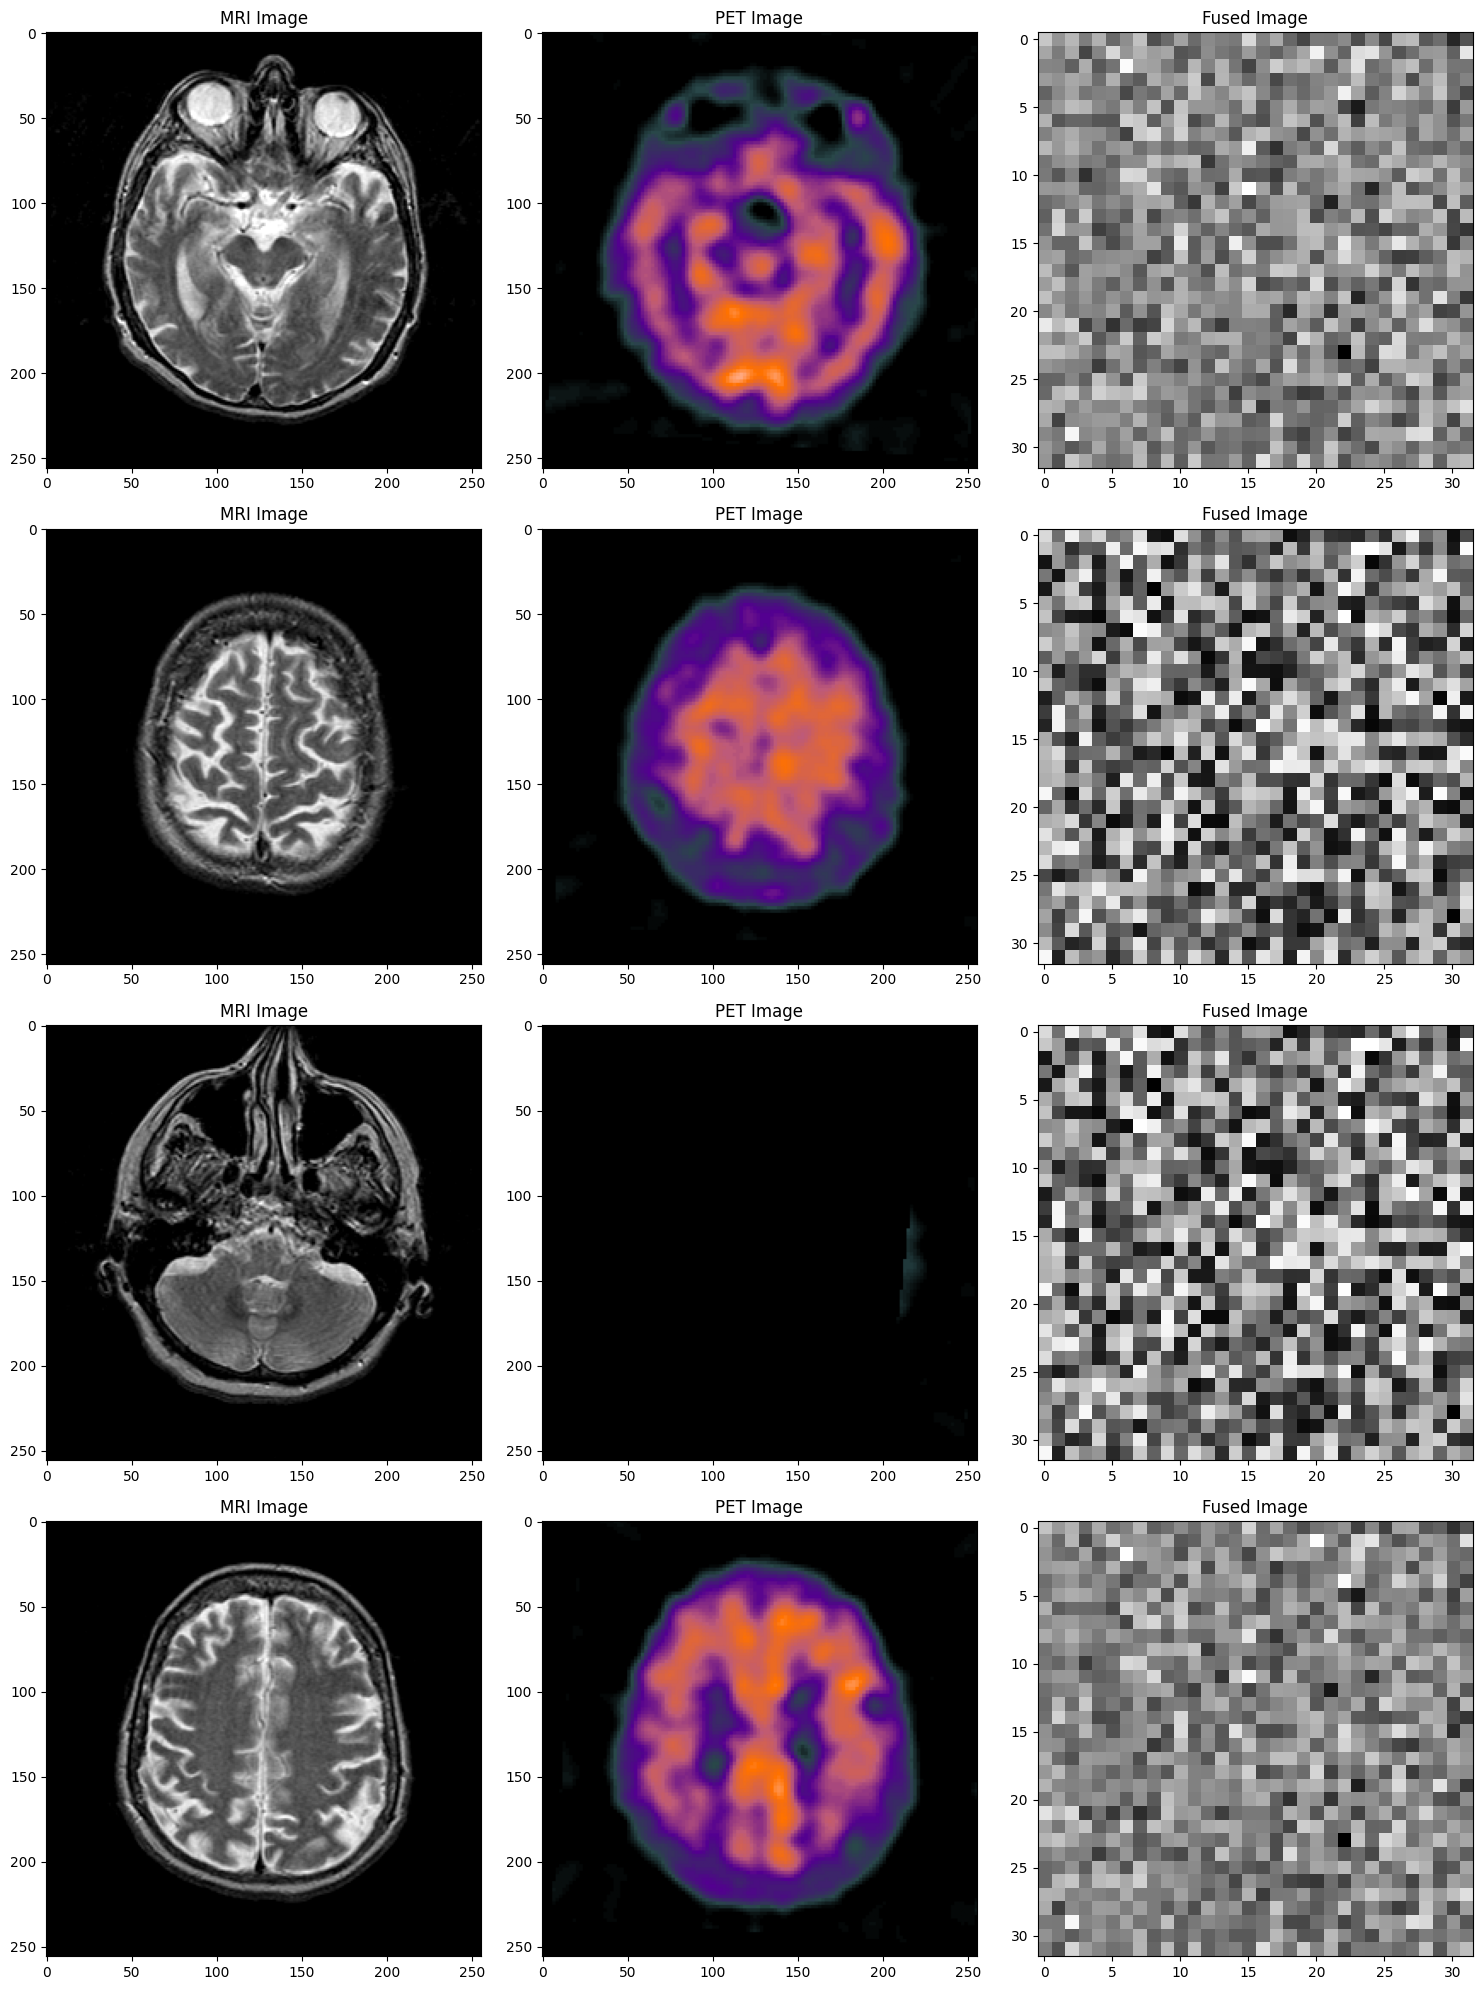

In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

def preprocess_images(mri_img, pet_img):
    # Permute dimensions to [batch_size, channels, height, width]
    mri_img = mri_img.permute(0, 3, 1, 2)
    pet_img = pet_img.permute(0, 3, 1, 2)
    
    if mri_img.shape[1] == 3:
        mri_img = torch.mean(mri_img, dim=1, keepdim=True)  
    
    # Ensure PET is RGB
    if pet_img.shape[1] == 1:
        pet_img = pet_img.repeat(1, 3, 1, 1)  
    
    print(f"Preprocessed MRI shape: {mri_img.shape}, PET shape: {pet_img.shape}")
    return mri_img, pet_img


def display_batch_fused_images(mri_imgs, pet_imgs, fused_imgs):
    batch_size = mri_imgs.size(0)
    plt.figure(figsize=(15, 5 * batch_size))
    
    for i in range(batch_size):
        mri_img_np = mri_imgs[i].squeeze().cpu().numpy()
        pet_img_np = pet_imgs[i].squeeze().cpu().numpy()
        fused_img_np = fused_imgs[i].squeeze().cpu().numpy()
        
        if mri_img_np.shape[0] == 1: 
            mri_img_np = mri_img_np[0]
        if pet_img_np.shape[0] == 3:
            pet_img_np = np.transpose(pet_img_np, (1, 2, 0))  

        plt.subplot(batch_size, 3, i * 3 + 1)
        plt.imshow(mri_img_np, cmap='gray')
        plt.title('MRI Image')
        
        plt.subplot(batch_size, 3, i * 3 + 2)
        plt.imshow(pet_img_np)
        plt.title('PET Image')
        
        plt.subplot(batch_size, 3, i * 3 + 3)
        plt.imshow(fused_img_np, cmap='gray')
        plt.title('Fused Image')
    
    plt.tight_layout()
    plt.show()


def fuse_test_images(model, test_loader):
    model.eval() 
    with torch.no_grad():
        for mri_img, pet_img in test_loader:

            mri_img, pet_img = preprocess_images(mri_img, pet_img)
    
            inputs = torch.cat((mri_img, pet_img), dim=1)  # Shape: [batch_size, 4, height, width]

            fused_images = model(inputs)
            
            display_batch_fused_images(mri_img, pet_img, fused_images)

model = FusionCNN()

fuse_test_images(model, alz_test_loader)

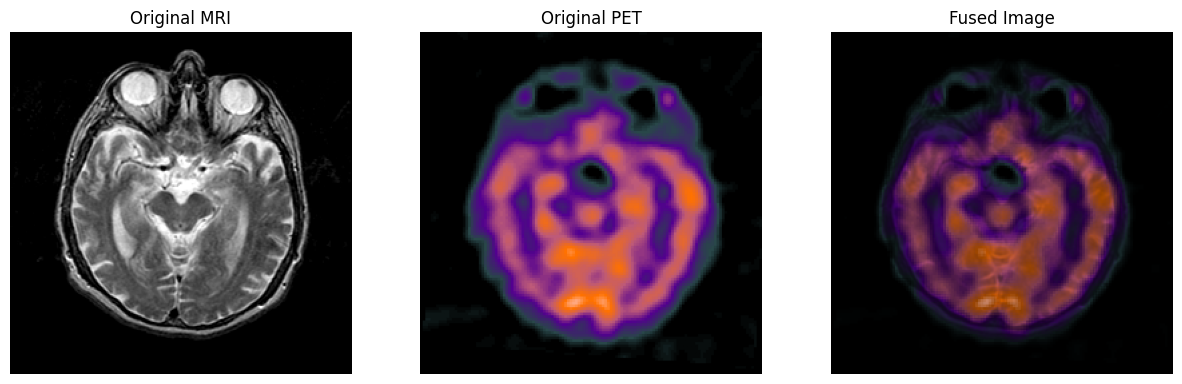

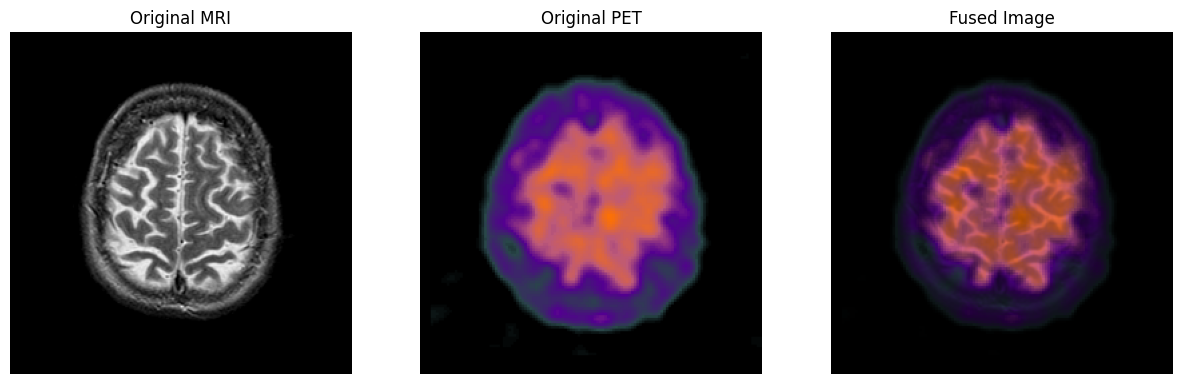

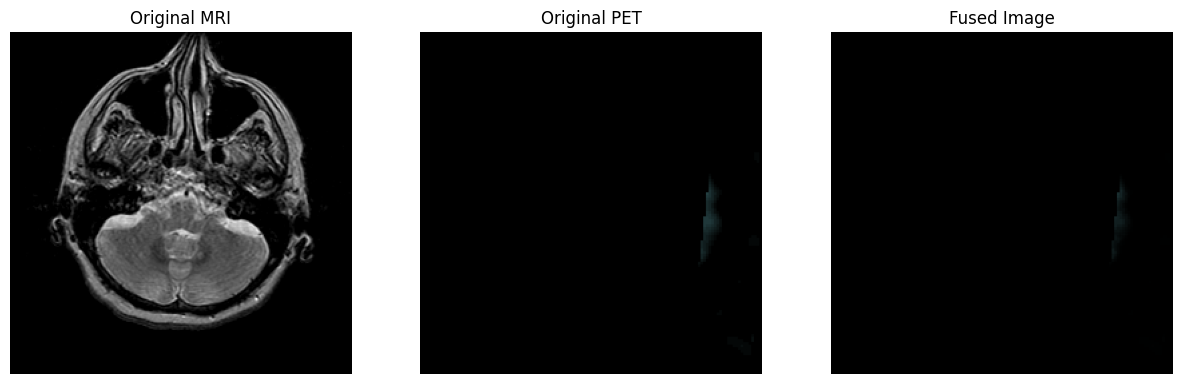

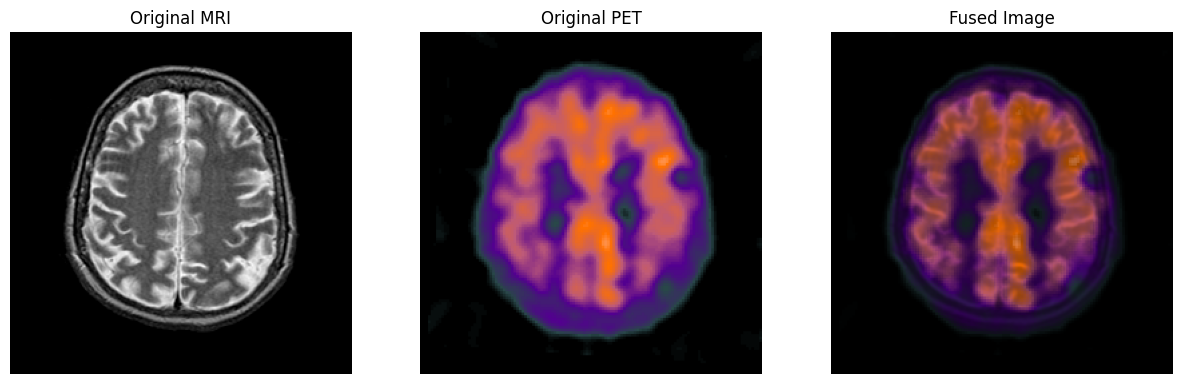

In [11]:
# shit1 fused based on pet color
def normalize_image(img):
    img = (img - img.min()) / (img.max() - img.min())
    return img

def enhance_edges(mri_image):
    if mri_image.ndim == 4 and mri_image.shape[1] != 1:
        mri_image = mri_image.permute(0, 3, 1, 2)  #[B, C, H, W]
    
    # Laplacian kernel for edge enhancement
    laplacian_kernel = torch.tensor([[[[0, 1, 0], [1, -4, 1], [0, 1, 0]]]], dtype=torch.float32).to(mri_image.device)
    mri_edges = F.conv2d(mri_image, laplacian_kernel, padding=1)
    mri_edges = normalize_image(mri_edges)
    return mri_edges.squeeze(0)  # Remove batch dimension

def fuse_image(mri_image, pet_image, mri_weight=0.5, pet_weight=0.5, edge_weight=0.2):
    if mri_image.shape[-1] == 3:
        mri_image = torch.mean(mri_image, dim=-1, keepdim=True)
    mri_image = normalize_image(mri_image).unsqueeze(0)  # [1, 1, H, W]
    
    pet_image_gray = torch.mean(pet_image, dim=-1, keepdim=True)
    pet_image_gray = normalize_image(pet_image_gray).unsqueeze(0)
    mri_edges = enhance_edges(mri_image)
    
    mri_image = mri_image.squeeze()  # Remove unnecessary dimensions [H, W]
    fused_image = mri_weight * mri_image + pet_weight * pet_image_gray.squeeze() + edge_weight * mri_edges
    fused_image = fused_image.cpu().numpy()

    pet_image_rgb = pet_image.permute(2, 0, 1).cpu().numpy()  
    fused_image_rgb = np.zeros_like(pet_image_rgb)
    for c in range(3):
        fused_image_rgb[c, :, :] = fused_image * pet_image_rgb[c, :, :] 

    return fused_image_rgb.transpose(1, 2, 0)

for i in range(len(alz_test_dataset)):
    mri_image, pet_image = alz_test_dataset[i]
    fused_result = fuse_image(mri_image, pet_image)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(mri_image.squeeze(), cmap='gray')
    plt.title("Original MRI")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(pet_image.squeeze())
    plt.title("Original PET")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(fused_result)  
    plt.title("Fused Image")
    plt.axis('off')

    plt.show()

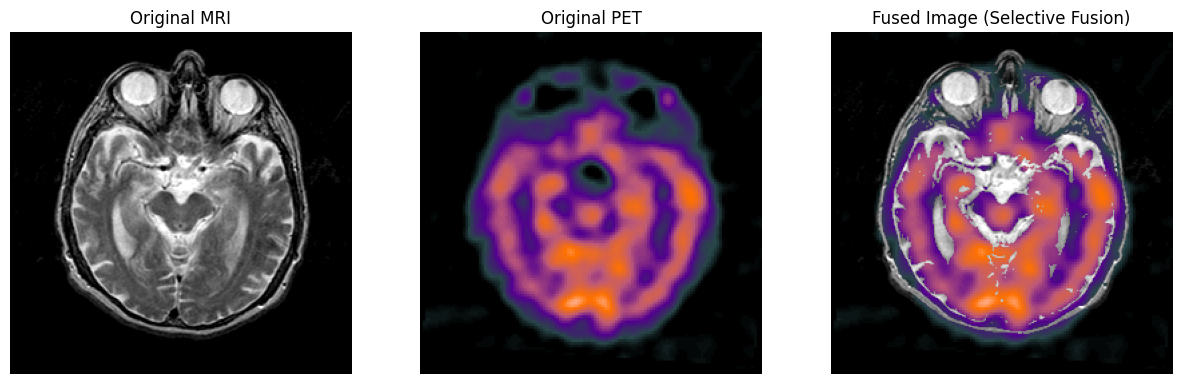

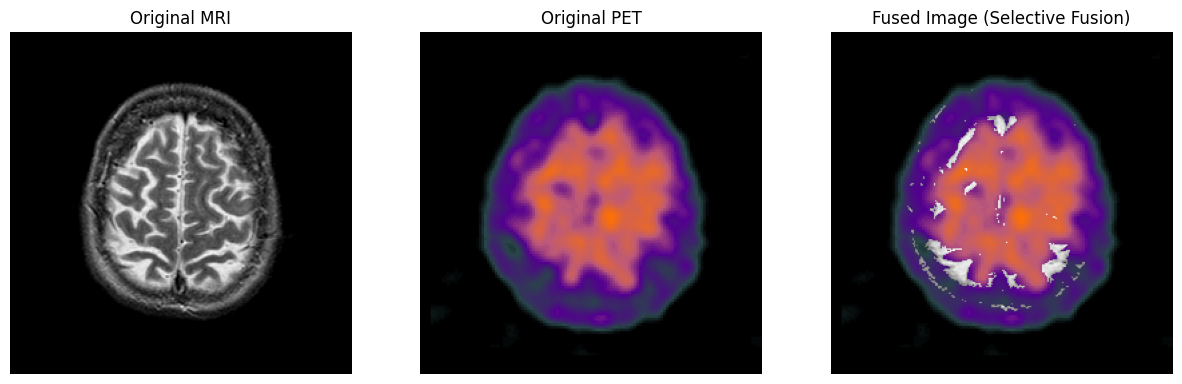

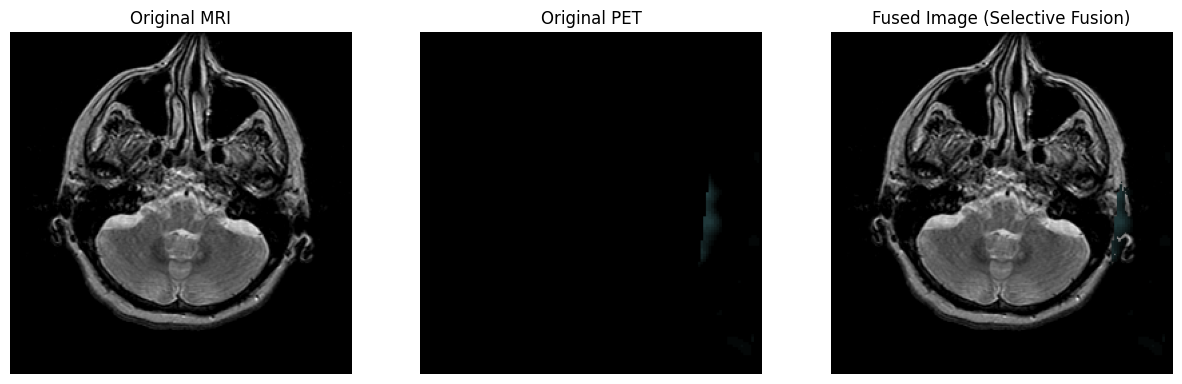

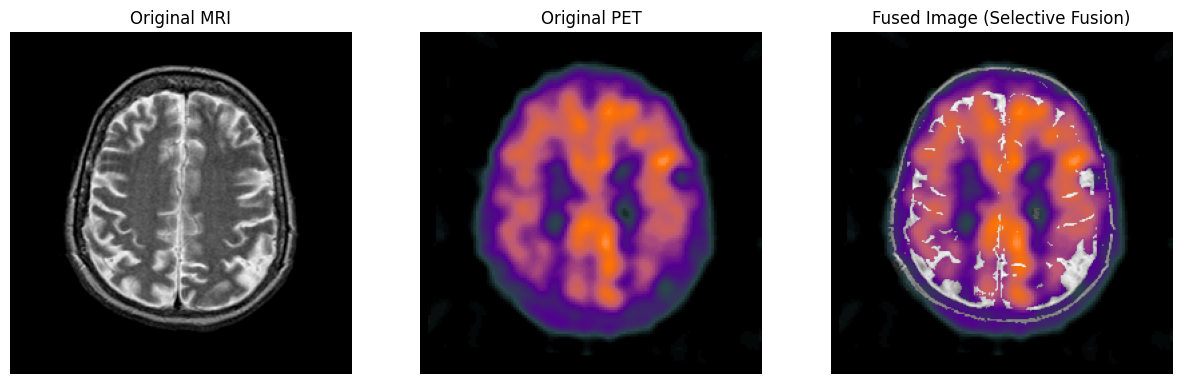

In [12]:
# shit2 
def normalize_image(img):
    img = (img - img.min()) / (img.max() - img.min())
    return img

# fuse MRI and PET images by selecting dominant regions
def fuse_image_selective(mri_image, pet_image):
    if mri_image.shape[-1] == 3:
        mri_image = torch.mean(mri_image, dim=-1, keepdim=True)
    mri_image = normalize_image(mri_image)
    
    pet_image_gray = torch.mean(pet_image, dim=-1, keepdim=True)
    pet_image_gray = normalize_image(pet_image_gray)

    mri_dominant_mask = mri_image > pet_image_gray 
    pet_dominant_mask = ~mri_dominant_mask          
    
    fused_intensity = torch.where(mri_dominant_mask, mri_image, pet_image_gray).squeeze().cpu().numpy()

    pet_image_rgb = pet_image.permute(2, 0, 1).cpu().numpy()  # Original PET color
    fused_image_rgb = np.zeros_like(pet_image_rgb)
    
    for c in range(3):
        pet_channel = pet_image_rgb[c, :, :]
        fused_image_rgb[c, :, :] = np.where(pet_dominant_mask.squeeze().cpu().numpy(), pet_channel, fused_intensity)

    return fused_image_rgb.transpose(1, 2, 0)  # Transpose to H, W, C 

for i in range(len(alz_test_dataset)):
    mri_image, pet_image = alz_test_dataset[i]
    fused_result = fuse_image_selective(mri_image, pet_image)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(mri_image.squeeze(), cmap='gray')
    plt.title("Original MRI")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(pet_image.squeeze())
    plt.title("Original PET")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(fused_result) 
    plt.title("Fused Image (Selective Fusion)")
    plt.axis('off')

    plt.show()

In [2]:
import tensorflow as tf
import numpy as np
# Define image paths
# Hyperparameters
IMG_SIZE = (256, 256)  # Desired image size for resizing
BATCH_SIZE = 32        # Batch size for training

# Preprocessing function
alz_mri_train = np.load('alz_mri_train.npy')
alz_mri_train = np.transpose(alz_mri_train,(3,0,1,2))
alz_mri_test = np.load('alz_mri_test.npy')
alz_mri_test = np.transpose(alz_mri_test,(3,0,1,2))
alz_mri_val = np.load('alz_mri_val.npy')
alz_mri_val = np.transpose(alz_mri_val,(3,0,1,2))

alz_pet_train = np.load('alz_pet_train.npy')
alz_pet_train = np.transpose(alz_pet_train,(3,0,1,2))
alz_pet_test = np.load('alz_pet_test.npy')
alz_pet_test = np.transpose(alz_pet_test,(3,0,1,2))
alz_pet_val = np.load('alz_gt_val.npy')
alz_pet_val = np.transpose(alz_pet_val,(3,0,1,2))

alz_gt_train = np.load('alz_gt_train.npy')
alz_gt_train = np.transpose(alz_gt_train,(3,0,1,2))
alz_gt_test = np.load('alz_gt_test.npy')
alz_gt_test = np.transpose(alz_gt_test,(3,0,1,2))
alz_gt_val = np.load('alz_gt_val.npy')
alz_gt_val = np.transpose(alz_gt_val,(3,0,1,2))

# Create datasets for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices(((alz_mri_test,alz_pet_test),
                                                    alz_gt_test))
train_dataset = train_dataset.shuffle(buffer_size=100).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices(((alz_mri_val,alz_pet_val),
                                                  alz_gt_test))
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from keras.callbacks import LearningRateScheduler
import keras
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.applications import ResNet50


class ImageFusionCNN(Model):
    def __init__(self):
        super(ImageFusionCNN, self).__init__()
        
        self.conv1_img1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')
        self.conv1_img2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')
        
        self.bn1 = layers.BatchNormalization()
        self.bn2 = layers.BatchNormalization()
        self.bn3 = layers.BatchNormalization()
        
        self.conv_residual_img1 = layers.Conv2D(16, (1, 1), activation='relu', padding='same')
        self.conv_residual_img2 = layers.Conv2D(16, (1, 1), activation='relu', padding='same')
        
        self.fusion_layer = layers.Conv2D(32, (3, 3), activation='relu', padding='same')
        
        self.reconstruct = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')

        self.normalize = layers.Lambda(lambda x: tf.clip_by_value(x, 0.0, 1.0))

    def call(self, inputs):
        img1 = inputs[0]
        img2 = inputs[1]
        
        x1 = self.conv1_img1(img1)
        x2 = self.conv1_img2(img2)
        
        x1 = self.bn1(x1)
        x2 = self.bn2(x2)
        
        x1_residual = self.conv_residual_img1(img1) + x1
        x2_residual = self.conv_residual_img2(img2) + x2
        
        x = layers.concatenate([x1_residual, x2_residual], axis=-1)
        
        x = self.fusion_layer(x)
        x = self.bn3(x)
        
        output = self.reconstruct(x)

        output = self.normalize(output)
        return output
    
momentum = 0.0
sgd = SGD(learning_rate=0.1, momentum=momentum, decay=0.0, nesterov=False)

# def exp_decay(epoch):
#     initial_lrate = 0.01
#     k = 0.01
#     lrate = initial_lrate * np.exp(-k*epoch)
#     return lrate

# lrate_ = LearningRateScheduler(exp_decay)
# callbacks_list_ = [lrate_]

fusion_model = ImageFusionCNN()

fusion_model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])




c:\Users\xings\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from keras.callbacks import LearningRateScheduler
import keras
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.applications import ResNet50

@tf.keras.utils.register_keras_serializable()
class ImageFusionCNN(Model):
    def __init__(self, **kwargs):
        super(ImageFusionCNN, self).__init__(**kwargs)  # Pass extra args to parent class
        
        self.conv1_img1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')
        self.conv1_img2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')
        
        self.bn1 = layers.BatchNormalization()
        self.bn2 = layers.BatchNormalization()
        self.bn3 = layers.BatchNormalization()
        
        self.conv_residual_img1 = layers.Conv2D(16, (1, 1), activation='relu', padding='same')
        self.conv_residual_img2 = layers.Conv2D(16, (1, 1), activation='relu', padding='same')
        
        self.fusion_layer = layers.Conv2D(32, (3, 3), activation='relu', padding='same')
        
        self.reconstruct = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')

        self.normalize = layers.Lambda(lambda x: tf.clip_by_value(x, 0.0, 1.0))

    def call(self, inputs):
        img1 = inputs[0]
        img2 = inputs[1]
        
        x1 = self.conv1_img1(img1)
        x2 = self.conv1_img2(img2)
        
        x1 = self.bn1(x1)
        x2 = self.bn2(x2)
        
        x1_residual = self.conv_residual_img1(img1) + x1
        x2_residual = self.conv_residual_img2(img2) + x2
        
        x = layers.concatenate([x1_residual, x2_residual], axis=-1)
        
        x = self.fusion_layer(x)
        x = self.bn3(x)
        
        output = self.reconstruct(x)

        output = self.normalize(output)
        return output

    def get_config(self):
        # Return a dictionary of arguments needed for initialization
        config = super(ImageFusionCNN, self).get_config()
        config.update({
            "input_shape": (256, 256, 3),  # Add any additional init args here
        })
        return config

    @classmethod
    def from_config(cls, config):
        # Recreate the instance from config
        return cls(**config)
    
momentum = 0.0
#sgd = SGD(learning_rate=0.1, momentum=momentum, decay=0.0, nesterov=False)

# def exp_decay(epoch):
#     initial_lrate = 0.01
#     k = 0.01
#     lrate = initial_lrate * np.exp(-k*epoch)
#     return lrate

# lrate_ = LearningRateScheduler(exp_decay)
# callbacks_list_ = [lrate_]

fusion_model = ImageFusionCNN()

fusion_model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])




In [66]:
# Train the model with validation
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',  
                               patience=3,         
                               restore_best_weights=True,
                               verbose=1)


Model_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

history = fusion_model.fit(
    train_dataset, 
    validation_data=val_dataset, 
    epochs=50,
    callbacks=[early_stopping, Model_Checkpoint]
)

print(history)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5928 - loss: 0.4626
Epoch 1: val_loss improved from inf to 0.46059, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5928 - loss: 0.4626 - val_accuracy: 0.8109 - val_loss: 0.4606
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8577 - loss: 0.4602
Epoch 2: val_loss improved from 0.46059 to 0.45917, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.8577 - loss: 0.4602 - val_accuracy: 0.8665 - val_loss: 0.4592
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8772 - loss: 0.4587
Epoch 3: val_loss improved from 0.45917 to 0.45830, saving model to best_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.8772 - loss: 0.4587 - val_accuracy: 0.8792 - val_loss: 0.4583
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8796 - loss: 0.4576
Epoch 4: val_loss improved from 0.45830 to 0.45784, saving model to best_mode

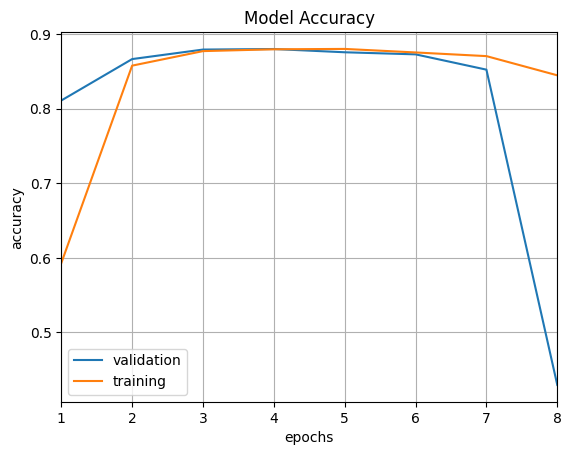

In [68]:
import matplotlib.pyplot as plt
epochs = 8
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='training')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#   plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    plt.close(fig)

plot_fig(0,history)

(256, 256, 3)


c:\Users\xings\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\model.py:156: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  Layer.__init__(self, *args, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


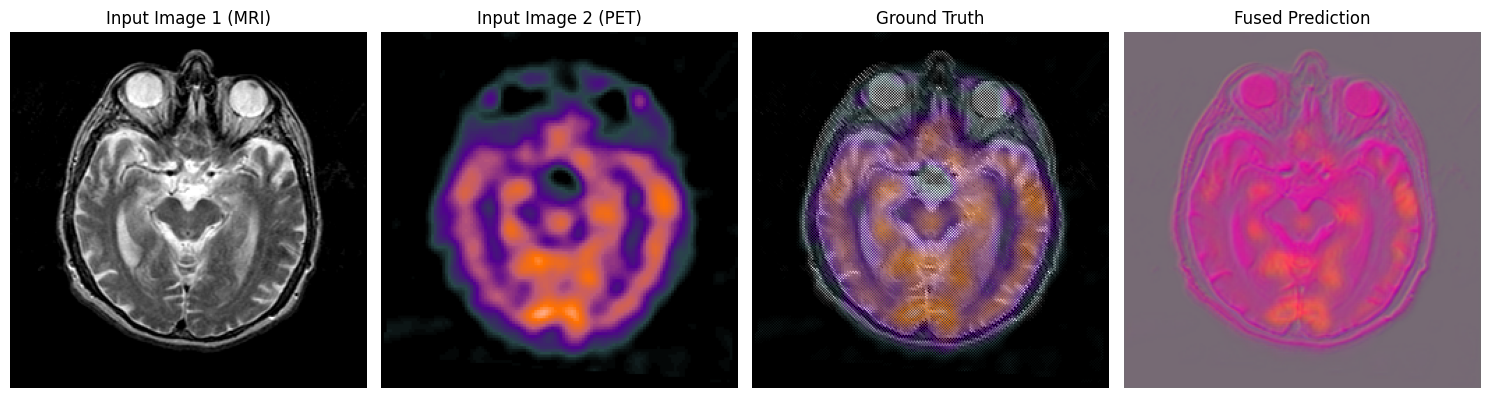

In [69]:
print(np.shape(alz_mri_test[0,:,:,:]))
img1_batch = np.expand_dims(alz_mri_test[0, :, :, :], axis=0)  # Shape becomes (1, 256, 256, 3)
img2_batch = np.expand_dims(alz_pet_test[0, :, :, :], axis=0)  # Shape becomes (1, 256, 256, 3)
from tensorflow.keras.preprocessing.image import array_to_img

# Apply the model to get the fused image prediction
fusion_model = tf.keras.models.load_model('best_model.keras')
fused_prediction = fusion_model.predict((img1_batch,img2_batch))


# Plot the input images, ground truth, and fused prediction
plt.figure(figsize=(15, 5))

# Plot Input Image 1 (MRI)
plt.subplot(1, 4, 1)
plt.imshow(alz_mri_test[0,:,:,:])  # Remove batch dimension for plotting
plt.title('Input Image 1 (MRI)')
plt.axis('off')

# Plot Input Image 2 (PET)
plt.subplot(1, 4, 2)
plt.imshow(alz_pet_test[0,:,:,:])  # Remove batch dimension for plotting
plt.title('Input Image 2 (PET)')
plt.axis('off')

# Plot Ground Truth

plt.subplot(1, 4, 3)
plt.imshow(alz_gt_test[0,:,:,:])  # Remove batch dimension for plotting
plt.title('Ground Truth')
plt.axis('off')

# Plot Fused Prediction
plt.subplot(1, 4, 4)
plt.imshow(array_to_img(fused_prediction[0]))  # Remove batch dimension for plotting
plt.title('Fused Prediction')
plt.axis('off')

plt.tight_layout()
plt.show()

In [70]:
fusion_model.save('image_fusion_model.h5')

In [5]:
import tensorflow as tf
import numpy as np
# Define image paths
# Hyperparameters
IMG_SIZE = (256, 256)  # Desired image size for resizing
BATCH_SIZE = 4        # Batch size for training

# Preprocessing function
alz_mri_train = np.concatenate([np.load('nrm_mri_train.npy'),np.load('alz_mri_train.npy'),np.load('hyp_mri_train.npy')],axis=-1)
alz_mri_train = np.transpose(alz_mri_train,(3,0,1,2))
alz_mri_test = np.concatenate([np.load('nrm_mri_test.npy'),np.load('alz_mri_test.npy'),np.load('hyp_mri_test.npy')],axis=-1)
alz_mri_test = np.transpose(alz_mri_test,(3,0,1,2))

alz_pet_train = np.concatenate([np.load('nrm_pet_train.npy'),np.load('alz_pet_train.npy'),np.load('hyp_pet_train.npy')],axis=-1)
alz_pet_train = np.transpose(alz_pet_train,(3,0,1,2))
alz_pet_test = np.concatenate([np.load('nrm_pet_test.npy'),np.load('alz_pet_test.npy'),np.load('hyp_pet_test.npy')],axis=-1)
alz_pet_test = np.transpose(alz_pet_test,(3,0,1,2))

# alz_gt_train = np.load('nrm_gt_train.npy')
# alz_gt_train = np.transpose(alz_gt_train,(3,0,1,2))
# alz_gt_test = np.load('nrm_gt_test.npy')
# alz_gt_test = np.transpose(alz_gt_test,(3,0,1,2))

alz_pet_val = np.concatenate([np.load('nrm_pet_val.npy'),np.load('alz_pet_val.npy'),np.load('hyp_pet_val.npy')],axis=-1)
alz_pet_val = np.transpose(alz_pet_val,(3,0,1,2))
alz_mri_val = np.concatenate([np.load('nrm_mri_val.npy'),np.load('alz_mri_val.npy'),np.load('hyp_mri_val.npy')],axis=-1)
alz_mri_val = np.transpose(alz_mri_val,(3,0,1,2))

# Create datasets for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices((alz_mri_test,alz_pet_test))
train_dataset = train_dataset.shuffle(buffer_size=100).batch(BATCH_SIZE)

print(np.shape(alz_pet_val))
print(np.shape(alz_mri_val))

val_dataset = tf.data.Dataset.from_tensor_slices((alz_mri_val,alz_pet_val))
val_dataset = val_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((alz_mri_test,alz_pet_test))
test_dataset = val_dataset.batch(BATCH_SIZE)

(15, 256, 256, 3)
(15, 256, 256, 3)


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def build_functional_image_fusion_model(input_shape=(256, 256, 3)):
    # Define inputs for two images
    img1_input = layers.Input(shape=input_shape, name="img1_input")
    img2_input = layers.Input(shape=input_shape, name="img2_input")

    # Image 1 processing branch
    x1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same', name="conv1_img1")(img1_input)
    x1 = layers.BatchNormalization(name="bn1_img1")(x1)
    x1_residual = layers.Conv2D(16, (1, 1), activation='relu', padding='same', name="conv_residual_img1")(img1_input)
    x1_residual = layers.Add(name="add_img1")([x1, x1_residual])

    # Image 2 processing branch
    x2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same', name="conv1_img2")(img2_input)
    x2 = layers.BatchNormalization(name="bn1_img2")(x2)
    x2_residual = layers.Conv2D(16, (1, 1), activation='relu', padding='same', name="conv_residual_img2")(img2_input)
    x2_residual = layers.Add(name="add_img2")([x2, x2_residual])

    # Concatenate residuals from both branches
    concatenated = layers.Concatenate(name="concatenate")([x1_residual, x2_residual])

    # Fusion layer
    fusion = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name="fusion_layer")(concatenated)
    fusion = layers.BatchNormalization(name="bn_fusion")(fusion)

    # Reconstruction layer
    reconstruction = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same', name="reconstruct")(fusion)

    # Normalization
    output = layers.Lambda(lambda x: tf.clip_by_value(x, 0.0, 1.0), name="normalize")(reconstruction)

    # Create model
    model = Model(inputs=[img1_input, img2_input], outputs=output, name="ImageFusionModel")
    return model

# Build the model
input_shape = (255, 255, 3)  # Example input shape
fuction_model = build_functional_image_fusion_model(input_shape=input_shape)

# Print the model summary
fuction_model.summary()


Model: "ImageFusionModel"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img1_input          │ (None, 255, 255,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ img2_input          │ (None, 255, 255,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_img1 (Conv2D) │ (None, 255, 255,  │        448 │ img1_input[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_img2 (Conv2D) │ (None, 255, 255,  │        448 │ img2_input[0][0]  │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn1_img1            │ (None, 255, 255,  │         64 │ conv1_img1[0][0]  │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_residual_img1  │ (None, 255, 255,  │         64 │ img1_input[0][0]  │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn1_img2            │ (None, 255, 255,  │         64 │ conv1_img2[0][0]  │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_residual_img2  │ (None, 255, 255,  │         64 │ img2_input[0][0]  │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_img1 (Add)      │ (None, 255, 255,  │          0 │ bn1_img1[0][0],   │
│                     │ 16)               │            │ conv_residual_im… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_img2 (Add)      │ (None, 255, 255,  │          0 │ bn1_img2[0][0],   │
│                     │ 16)               │            │ conv_residual_im… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 255, 255,  │          0 │ add_img1[0][0],   │
│ (Concatenate)       │ 32)               │            │ add_img2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fusion_layer        │ (None, 255, 255,  │      9,248 │ concatenate[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_fusion           │ (None, 255, 255,  │        128 │ fusion_layer[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reconstruct         │ (None, 255, 255,  │        867 │ bn_fusion[0][0]   │
│ (Conv2D)            │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalize (Lambda)  │ (None, 255, 255,  │          0 │ reconstruct[0][0] │
│                     │ 3)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,395 (44.51 KB)

 Trainable params: 11,267 (44.01 KB)

 Non-trainable params: 128 (512.00 B)

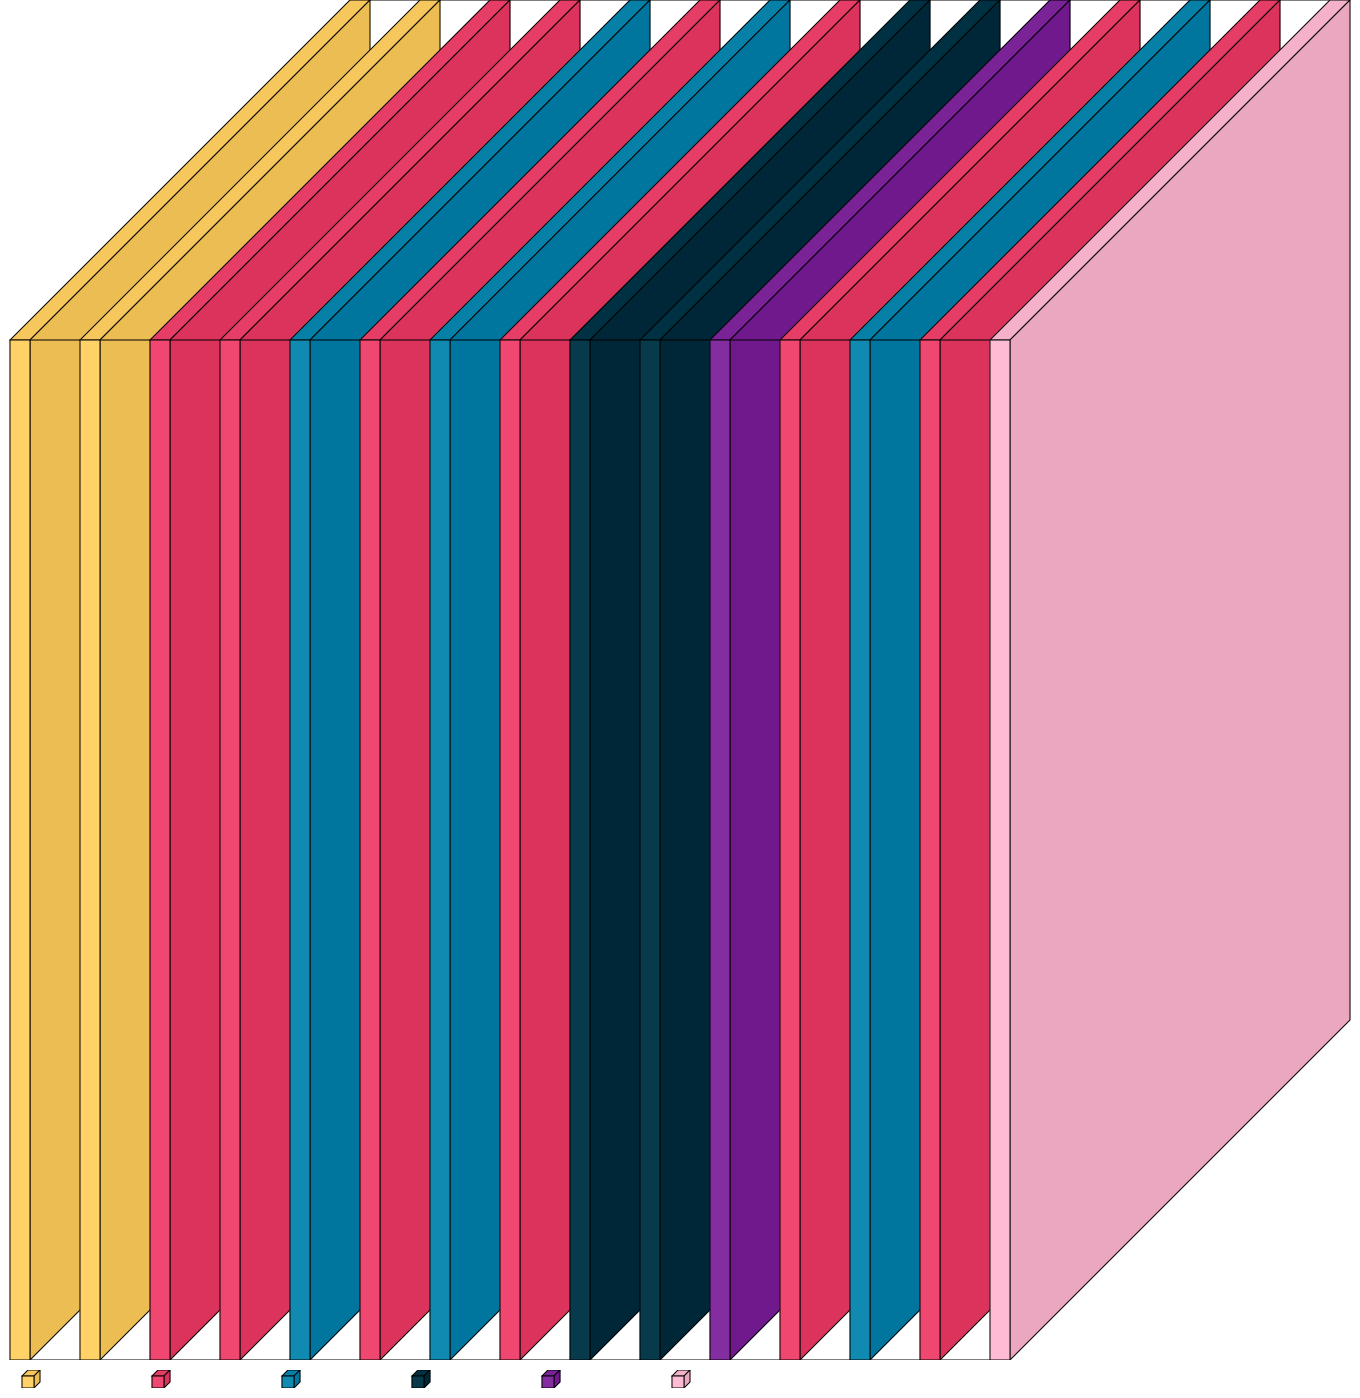

In [15]:
import visualkeras
visualkeras.layered_view(fusion_model, legend=True, draw_volume=True, spacing=50)



In [20]:
def fusion_loss_with_ssim(input1, input2, fused):
    """
    Combines SSIM and pixel intensity loss for fusion.
    
    Args:
        input1: First input image (batch, height, width, 1)
        input2: Second input image (batch, height, width, 1)
        fused: Fused output image (batch, height, width, 1)
    
    Returns:
        Loss value (float).
    """
    # SSIM loss (maximize SSIM, so negate it)
    ssim1 = tf.reduce_mean(tf.image.ssim(fused, input1, max_val=1.0))  # SSIM with input1
    ssim2 = tf.reduce_mean(tf.image.ssim(fused, input2, max_val=1.0))  # SSIM with input2
    ssim_loss = -(ssim1 + ssim2) / 2.0  # Average SSIM

    # Pixel intensity loss
    pixel_loss = tf.reduce_mean(tf.square(fused - input1))*0.5 + tf.reduce_mean(tf.square(fused - input2))*0.5    # Combine losses (weighted sum)
    total_loss = 0.7 * ssim_loss + 0.3 * pixel_loss
    return total_loss


In [23]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

# Number of epochs and steps per epoch
epochs = 100
steps_per_epoch = 100

for epoch in range(epochs):
    for step, (input1, input2) in enumerate(train_dataset.take(steps_per_epoch)):

        with tf.GradientTape() as tape:
            fused = fusion_model((input1,input2), training=True)
            loss = fusion_loss_with_ssim(input1, input2, fused)
        
        # Backward pass and optimization
        gradients = tape.gradient(loss, fusion_model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, fusion_model.trainable_variables))

        # Print the loss every 10 steps
        if step % 10 == 0:
            print(f"Epoch {epoch+1}, Step {step+1}, Loss: {loss.numpy():.4f}")


Epoch 1, Step 1, Loss: -0.0058
Epoch 2, Step 1, Loss: 0.0070
Epoch 3, Step 1, Loss: -0.0012
Epoch 4, Step 1, Loss: -0.0062
Epoch 5, Step 1, Loss: -0.0144
Epoch 6, Step 1, Loss: -0.0330
Epoch 7, Step 1, Loss: 0.0117


KeyboardInterrupt: 

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
img1_batch = np.expand_dims(alz_mri_test[3, :, :, :], axis=0)  # Shape becomes (1, 256, 256, 3)
img2_batch = np.expand_dims(alz_pet_test[3, :, :, :], axis=0)  # Shape becomes (1, 256, 256, 3)
fused = fusion_model((img1_batch,img2_batch),training=False)
loss = fusion_loss_with_ssim(input1, input2, fused)
# Display the fused image
fig, axs = plt.subplots(1, 3, figsize = (12,6))
axs[0].imshow(array_to_img(fused[0]))
axs[0].axis('off')
axs[1].imshow(array_to_img(img1_batch[0]))
axs[1].axis('off')
axs[2].imshow(array_to_img(img2_batch[0]))
axs[2].axis('off')
plt.show()

ValueError: Input 0 of layer "ImageFusionModel" is incompatible with the layer: expected shape=(None, 255, 255, 3), found shape=(1, 256, 256, 3)

In [ ]:
import tensorflow as tf

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

epochs = 1000
patience = 5  
best_val_loss = float('inf') 
patience_counter = 0
best_weights = None

for epoch in range(epochs):
    for step, (input1, input2) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            fused = fusion_model((input1, input2), training=True)
            loss = fusion_loss_with_ssim(input1, input2, fused)
        
        gradients = tape.gradient(loss, fusion_model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, fusion_model.trainable_variables))
 
        print(f"Epoch {epoch+1}, Step {step+1}, Loss: {loss.numpy():.4f}")

    val_loss = 0
    num_val_batches = 0
    for val_input1, val_input2 in val_dataset:
        fused_val = fusion_model((val_input1, val_input2), training=False)
        val_loss += fusion_loss_with_ssim(val_input1, val_input2, fused_val)
        num_val_batches += 1

    val_loss = val_loss / num_val_batches
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss.numpy():.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_weights = fusion_model.get_weights()  # Save the best weights
        patience_counter = 0  # Reset patience counter
    else:
        patience_counter += 1
    
    if patience_counter >= patience:
        print(f"Early stopping triggered at epoch {epoch+1}")
        break

# After training, restore the best weights if early stopping was triggered
if best_weights is not None:
    fusion_model.set_weights(best_weights)
    print("Restored the best model weights.")



Epoch 1, Step 1, Loss: -0.5819
Epoch 1, Step 2, Loss: -0.5593
Epoch 1, Step 3, Loss: -0.5617
Epoch 1, Step 4, Loss: -0.5231
Epoch 1, Validation Loss: -0.5478
Epoch 2, Step 1, Loss: -0.5777
Epoch 2, Step 2, Loss: -0.5261
Epoch 2, Step 3, Loss: -0.5540
Epoch 2, Step 4, Loss: -0.5834
Epoch 2, Validation Loss: -0.5484
Epoch 3, Step 1, Loss: -0.5687
Epoch 3, Step 2, Loss: -0.5701
Epoch 3, Step 3, Loss: -0.5326
Epoch 3, Step 4, Loss: -0.5657
Epoch 3, Validation Loss: -0.5484
Epoch 4, Step 1, Loss: -0.5866
Epoch 4, Step 2, Loss: -0.5454
Epoch 4, Step 3, Loss: -0.5440
Epoch 4, Step 4, Loss: -0.5601
Epoch 4, Validation Loss: -0.5483
Epoch 5, Step 1, Loss: -0.5643
Epoch 5, Step 2, Loss: -0.5653
Epoch 5, Step 3, Loss: -0.5507
Epoch 5, Step 4, Loss: -0.5548
Epoch 5, Validation Loss: -0.5484
Epoch 6, Step 1, Loss: -0.5588
Epoch 6, Step 2, Loss: -0.5473
Epoch 6, Step 3, Loss: -0.5608
Epoch 6, Step 4, Loss: -0.5722
Epoch 6, Validation Loss: -0.5485
Epoch 7, Step 1, Loss: -0.5535
Epoch 7, Step 2, Loss

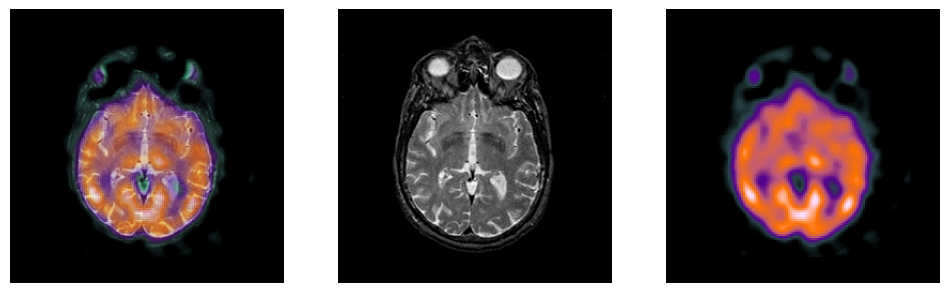

tf.Tensor(-0.42358726, shape=(), dtype=float32)


In [35]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
img1_batch = np.expand_dims(alz_mri_test[3, :, :, :], axis=0)  # Shape becomes (1, 256, 256, 3)
img2_batch = np.expand_dims(alz_pet_test[3, :, :, :], axis=0)  # Shape becomes (1, 256, 256, 3)
fused = fusion_model((img1_batch,img2_batch),training=False)
loss = fusion_loss_with_ssim(input1, input2, fused)
# Display the fused image
fig, axs = plt.subplots(1, 3, figsize = (12,6))
axs[0].imshow(array_to_img(fused[0]))
axs[0].axis('off')
axs[1].imshow(array_to_img(img1_batch[0]))
axs[1].axis('off')
axs[2].imshow(array_to_img(img2_batch[0]))
axs[2].axis('off')
plt.show()
print(loss)

In [39]:
import numpy as np
from sklearn.metrics import normalized_mutual_info_score

def calculate_nmi(image1, image2, fused_image):
    """
    Calculate the Normalized Mutual Information (NMI) of the fused image
    with respect to the two input images.

    Args:
        image1 (numpy.ndarray): First original image (grayscale).
        image2 (numpy.ndarray): Second original image (grayscale).
        fused_image (numpy.ndarray): Fused image (grayscale).

    Returns:
        nmi1 (float): NMI between image1 and fused_image.
        nmi2 (float): NMI between image2 and fused_image.
    """
    # Flatten the images to 1D arrays
    image1_flat = image1.flatten()
    image2_flat = image2.flatten()
    fused_flat = fused_image.flatten()
    
    # Compute NMI
    nmi1 = normalized_mutual_info_score(image1_flat, fused_flat)
    nmi2 = normalized_mutual_info_score(image2_flat, fused_flat)
    
    return nmi1, nmi2

# Example usage
image1 = np.array(img1_batch[0]) # Example grayscale image 1
image2 = np.array(img2_batch[0])  # Example grayscale image 2
fused_image = np.array(fused[0])  # Example fused image

nmi1, nmi2 = calculate_nmi(image1, image2, fused_image)
print(f"NMI between Image 1 and Fused Image: {nmi1:.4f}")
print(f"NMI between Image 2 and Fused Image: {nmi2:.4f}")


NMI between Image 1 and Fused Image: 0.4503
NMI between Image 2 and Fused Image: 0.4633


c:\Users\xings\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
c:\Users\xings\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [37]:
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Function to calculate SSIM between a fused image and two input images
def calculate_ssim(input1, input2, fused_image):
    # Convert images to the same shape (if needed)
    # Ensure all images have the same dimensions and are in [0, 1] range
    input1 = tf.image.convert_image_dtype(input1, tf.float32)  # Convert to [0, 1]
    input2 = tf.image.convert_image_dtype(input2, tf.float32)  # Convert to [0, 1]
    fused_image = tf.image.convert_image_dtype(fused_image, tf.float32)  # Convert to [0, 1]

    # Compute SSIM between the fused image and input1
    ssim_input1 = tf.image.ssim(input1, fused_image, max_val=1.0)

    # Compute SSIM between the fused image and input2
    ssim_input2 = tf.image.ssim(input2, fused_image, max_val=1.0)

    return ssim_input1, ssim_input2

# Example usage (assuming input1, input2, and fused_image are TensorFlow tensors)
# input1, input2, and fused_image should have shape [batch_size, height, width, channels]

image1 = np.array(img1_batch[0]) # Example grayscale image 1
image2 = np.array(img2_batch[0])  # Example grayscale image 2
fused_image = np.array(fused[0])  # Example fused image

# Call the function to calculate SSIM
ssim1, ssim2 = calculate_ssim(input1, input2, fused_image)

# Print the results
print(f"SSIM between fused image and input1: {ssim1.numpy()[0]}")
print(f"SSIM between fused image and input2: {ssim2.numpy()[0]}")


SSIM between fused image and input1: 0.5468907952308655
SSIM between fused image and input2: 0.6136701107025146


In [38]:
import tensorflow as tf

# Define pixel-wise Mean Squared Error (MSE) loss
def pixel_wise_mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred), axis=-1)

# Example usage
# Assuming `y_true` and `y_pred` are images of shape (batch_size, height, width, channels)
image1 = np.array(img1_batch[0]) # Example grayscale image 1
image2 = np.array(img2_batch[0])  # Example grayscale image 2
fused_image = np.array(fused[0])  # Example fused image

# Calculate pixel-wise loss
loss = np.mean((image1, fused_image))
loss2 = np.mean(pixel_wise_mse_loss(image2, fused_image))
print(f"Pixel-wise MSE Loss: {loss}")
print(f"Pixel-wise MSE Loss: {loss2}")


Pixel-wise MSE Loss: 0.11636503785848618
Pixel-wise MSE Loss: 0.00451213214546442


In [52]:
fusion_model.summary()

Model: "image_fusion_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (4, 256, 256, 16)      │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (4, 256, 256, 16)      │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (4, 256, 256, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (4, 256, 256, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (4, 256, 256, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (4, 256, 256, 16)      │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (4, 256, 256, 16)      │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (4, 256, 256, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (4, 256, 256, 3)       │           867 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (4, 256, 256, 3)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,395 (44.51 KB)

 Trainable params: 11,267 (44.01 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Define the encoder
def build_encoder(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    encoded = layers.Conv2D(3, (1, 1), activation='relu', padding='same')(x)
    return Model(inputs, encoded, name="encoder")

# Define the decoder
def build_decoder(encoded_shape):
    encoded_inputs = layers.Input(shape=encoded_shape)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoded_inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Output shape (H, W, 3)
    return Model(encoded_inputs, decoded, name="decoder")

# Build the fusion model
def build_fusion_model(input_shape):
    encoder = build_encoder(input_shape)
    decoder = build_decoder((256, 256, 3))  # Adjust shape based on your encoder output

    input1 = layers.Input(shape=input_shape, name="input1")
    input2 = layers.Input(shape=input_shape, name="input2")

    # Encode both inputs
    encoded1 = encoder(input1)
    encoded2 = encoder(input2)

    # Fuse the encodings using concatenation
    fused = layers.Concatenate(axis=-1)([encoded1, encoded2])

    # Decode the fused representation
    output = decoder(fused)

    return Model(inputs=[input1, input2], outputs=output, name="fusion_autoencoder")

# Build the model
input_shape = (256, 256, 3)
fusion_model = build_fusion_model(input_shape)
fusion_model.summary()


Model: "fusion_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer) │ (None, 256, 256,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input2 (InputLayer) │ (None, 256, 256,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ (None, 256, 256,  │     76,803 │ input1[0][0],     │
│ (Functional)        │ 3)                │            │ input2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4086    │ (None, 256, 256,  │          0 │ encoder[0][0],    │
│ (Concatenate)       │ 6)                │            │ encoder[1][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 256, 256,  │    164,611 │ concatenate_4086… │
│ (Functional)        │ 3)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 241,414 (943.02 KB)

 Trainable params: 240,390 (939.02 KB)

 Non-trainable params: 1,024 (4.00 KB)

In [59]:
# Train the model
history = fusion_model.fit(
    [alz_mri_train, alz_pet_train],  # Inputs
    [alz_mri_train, alz_pet_train],                  # Ground truth
    validation_data=([alz_mri_val, alz_pet_val], [alz_mri_val, alz_pet_val]),
    batch_size=16,                 # Batch size
    epochs=50,                     # Number of epochs
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    ]
)

# Save the trained model
fusion_model.save("fusion_autoencoder_model.h5")


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - loss: 0.2152 - mse: 0.2152 - val_loss: 0.1723 - val_mse: 0.1723
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - loss: 0.1179 - mse: 0.1179 - val_loss: 0.1625 - val_mse: 0.1625
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - loss: 0.0919 - mse: 0.0919 - val_loss: 0.1432 - val_mse: 0.1432
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - loss: 0.0766 - mse: 0.0766 - val_loss: 0.1208 - val_mse: 0.1208
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - loss: 0.0698 - mse: 0.0698 - val_loss: 0.0999 - val_mse: 0.0999
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - loss: 0.0622 - mse: 0.0622 - val_loss: 0.0828 - val_mse: 0.0828
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - loss: 0.0554 - mse: 0.0554 - val_loss: 0.0724 - val_mse: 0.0724
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - loss: 0.0493 - mse: 0.0493 - val_loss: 0.0667 - val_mse: 0.0667
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - loss: 0.0449 - mse: 0.0449 - val_loss:

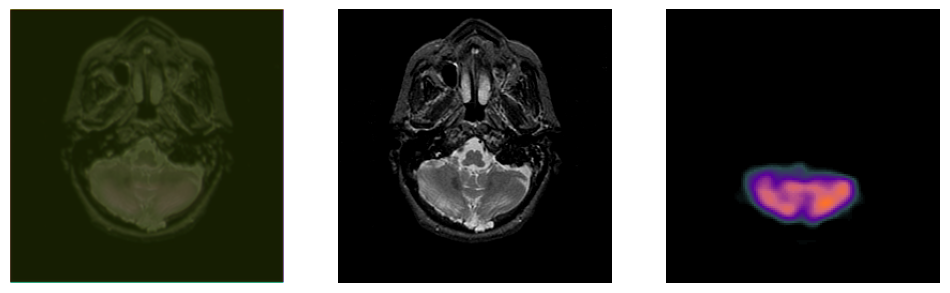

tf.Tensor(-0.044053774, shape=(), dtype=float32)


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.models import load_model, Model

fusion_model = load_model("fusion_autoencoder_model.h5")
img1_batch = np.expand_dims(alz_mri_test[3, :, :, :], axis=0)  # Shape becomes (1, 256, 256, 3)
img2_batch = np.expand_dims(alz_pet_test[3, :, :, :], axis=0)  # Shape becomes (1, 256, 256, 3)

encoder = Model(
    inputs=fusion_model.input,  # Assuming the model has two inputs
    outputs=fusion_model.get_layer("concatenate").output  # Output from the concatenation layer
)

fused = encoder((img1_batch,img2_batch),training=False)
loss = fusion_loss_with_ssim(input1, input2, fused)
# Display the fused image
fig, axs = plt.subplots(1, 3, figsize = (12,6))
axs[0].imshow(array_to_img(fused[0]))
axs[0].axis('off')
axs[1].imshow(array_to_img(img1_batch[0]))
axs[1].axis('off')
axs[2].imshow(array_to_img(img2_batch[0]))
axs[2].axis('off')
plt.show()
print(loss)

In [63]:
def custom_fusion_loss(y_true, y_pred):
    # Mean Squared Error (MSE)
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    
    # Structural Similarity Index (SSIM)
    ssim_loss = 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    
    # Combine losses with weights
    combined_loss = 0.8 * mse_loss + 0.2 * ssim_loss
    return combined_loss

In [88]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Define the encoder
def build_encoder(input_shape):
    input1 = layers.Input(shape=input_shape, name="encoder_input1")
    input2 = layers.Input(shape=input_shape, name="encoder_input2")

    x1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
    encode1 = layers.BatchNormalization()(x1)

    x2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input2)
    x2 = layers.BatchNormalization()(x2)
    x2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x2)
    encode2 = layers.BatchNormalization()(x2)

    x = layers.Concatenate(axis=-1)([encode1, encode2])
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    fused_encoding = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    return Model(inputs=[input1, input2], outputs=fused_encoding, name="encoder")

# Define the decoder
def build_decoder(encoded_shape):
    encoded_inputs = layers.Input(shape=encoded_shape, name="decoder_input")
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoded_inputs)
    x = layers.BatchNormalization()(x)

    x1 = layers.Lambda(lambda t: t[..., :128], name="output1")(x)
    x2 = layers.Lambda(lambda t: t[..., 128:], name="output2")(x)

    x1 = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x1)
    output1 = layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x1)

    x2 = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x2)
    output2 = layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x2)

    return Model(encoded_inputs, [output1, output2], name="decoder")

def build_fusion_model(input_shape):
    encoder = build_encoder(input_shape)
    decoder = build_decoder((256, 256, 3))
    input1 = layers.Input(shape=input_shape, name="input1")
    input2 = layers.Input(shape=input_shape, name="input2")

    fused = encoder([input1, input2])

    output1, output2 = decoder(fused)

    return Model(inputs=[input1, input2], outputs=[output1, output2], name="fusion_autoencoder")


# Build the model
input_shape = (256, 256, 3)
fusion_model = build_fusion_model(input_shape)
fusion_model.summary()


Model: "fusion_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer) │ (None, 256, 256,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input2 (InputLayer) │ (None, 256, 256,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ (None, 256, 256,  │    749,827 │ input1[0][0],     │
│ (Functional)        │ 3)                │            │ input2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ [(None, 256, 256, │    159,238 │ encoder[0][0]     │
│ (Functional)        │ 3), (None, 256,   │            │                   │
│                     │ 256, 3)]          │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 909,065 (3.47 MB)

 Trainable params: 907,785 (3.46 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [89]:
fusion_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=custom_fusion_loss,  # Use custom loss
    metrics=["mse","mse"]  # You can add other metrics as well
)

def step_decay(epoch):
    initial_lr = 0.0001
    drop_factor = 0.1
    step_size = 10
    lr = initial_lr * (drop_factor ** (epoch // step_size))
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(step_decay)

history = fusion_model.fit(
    [alz_mri_train, alz_pet_train],  # Inputs
    [alz_mri_train, alz_pet_train],                  # Ground truth
    validation_data=([alz_mri_val, alz_pet_val], [alz_mri_val, alz_pet_val]),
    batch_size=16,                 # Batch size
    epochs=50,                     # Number of epochs
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
        lr_schedule
    ]
)

# Save the trained model
fusion_model.save("fusion_autoencoder_model.h5")

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 32s 9s/step - decoder_loss: 0.3351 - decoder_mse: 0.1820 - decoder_mse_1: 0.1862 - loss: 0.6743 - val_decoder_loss: 0.3211 - val_decoder_mse: 0.1723 - val_decoder_mse_1: 0.1813 - val_loss: 0.6435 - learning_rate: 1.0000e-04
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 10s/step - decoder_loss: 0.2960 - decoder_mse: 0.1343 - decoder_mse_1: 0.1512 - loss: 0.5829 - val_decoder_loss: 0.3175 - val_decoder_mse: 0.1670 - val_decoder_mse_1: 0.1770 - val_loss: 0.6357 - learning_rate: 1.0000e-04
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 10s/step - decoder_loss: 0.2608 - decoder_mse: 0.0998 - decoder_mse_1: 0.1136 - loss: 0.5145 - val_decoder_loss: 0.3142 - val_decoder_mse: 0.1622 - val_decoder_mse_1: 0.1729 - val_loss: 0.6284 - learning_rate: 1.0000e-04
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 10s/step - decoder_loss: 0.2356 - decoder_mse: 0.0742 - decoder_mse_1: 0.0824 - loss: 0.4597 - val_decoder_loss: 0.3112 - val_decoder_mse: 0.1579 - val_decoder_mse_1: 0.1694 - va

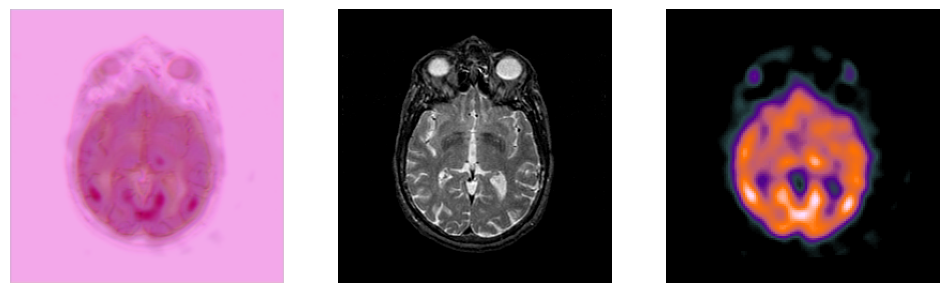

tf.Tensor(0.01768367, shape=(), dtype=float32)


In [90]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.models import load_model, Model

img1_batch = np.expand_dims(alz_mri_test[3, :, :, :], axis=0)  # Shape becomes (1, 256, 256, 3)
img2_batch = np.expand_dims(alz_pet_test[3, :, :, :], axis=0)  # Shape becomes (1, 256, 256, 3)

encoder = fusion_model.get_layer("encoder")

fused = encoder((img1_batch,img2_batch),training=False)
loss = fusion_loss_with_ssim(input1, input2, fused)
# Display the fused image
fig, axs = plt.subplots(1, 3, figsize = (12,6))
axs[0].imshow(array_to_img(fused[0]))
axs[0].axis('off')
axs[1].imshow(array_to_img(img1_batch[0]))
axs[1].axis('off')
axs[2].imshow(array_to_img(img2_batch[0]))
axs[2].axis('off')
plt.show()
print(loss)

In [2]:
print(np.shape(alz_pet_test))
print(np.shape(alz_mri_test))

(15, 256, 256, 3)
(15, 256, 256, 3)


In [13]:
import os
import numpy as np
from PIL import Image

n = 15
data = alz_mri_test

data = (data * 255).clip(0, 255).astype(np.uint8)

output_folder = "mri_output_images"
os.makedirs(output_folder, exist_ok=True)

for i in range(data.shape[0]):
    image = Image.fromarray(data[i], 'RGB')
    image.save(os.path.join(output_folder, f"image_{i+1}.png"))

print(f"Saved {n} images to '{output_folder}'")

Saved 15 images to 'mri_output_images'


In [12]:
import os
import numpy as np
from PIL import Image

# Assuming `alz_pet_test` is your numpy array with float values in the range (0, 1)
data = alz_pet_test

# Scale the data to 0-255 and convert to uint8
data = (data * 255).clip(0, 255).astype(np.uint8)

# Define output folder
output_folder = "pet_output_images"
os.makedirs(output_folder, exist_ok=True)

# Loop through the numpy array and save each image
for i in range(data.shape[0]):
    image = Image.fromarray(data[i, :, :, :], mode='RGB')
    image.save(os.path.join(output_folder, f"image_{i+1}.png"))

print(f"Saved {data.shape[0]} images to '{output_folder}'")


Saved 15 images to 'pet_output_images'
